# Customer Reviews Sentiment Analysis

## I. Introduction

**_What is Natural Language Processing ?_**

Natural Language Processing (NLP) is a field of artificial intelligence (AI) that focuses on enabling computers to understand, interpret, generate, and respond to human language in a meaningful way. It combines techniques from computer science, linguistics, and machine learning to process text or speech and extract useful information from it. NLP is a discipline that bridges the gap between human communication and digital understanding.

**_What is Sentiment Analysis ?_**

Sentiment analysis, also known as opinion mining or emotion AI, is a technique in Natural Language Processing (NLP) that identifies and interprets the emotional tone expressed in text. It determines whether a piece of writing—such as a tweet, review, comment, or article—conveys a positive, negative, or neutral sentiment.

**_Why sentiment analysis on customer reviews ?_**

Sentiment analysis on customer reviews is conducted to transform large volumes of written feedback into meaningful insights that support better decision-making. Customer reviews contain rich information about people’s experiences, expectations, and frustrations. However, manually reading thousands of reviews is inefficient and often inconsistent. By applying sentiment analysis, we can automatically identify whether customers express positive, negative, or neutral opinions and determine which product or service aspects drive these emotions.

This analysis helps organizations understand overall customer satisfaction, detect emerging issues, and recognize strengths appreciated by users. It also enables continuous improvement by highlighting areas that need attention, such as product features, delivery processes, or customer support interactions. Additionally, sentiment trends can inform marketing strategies, brand reputation management, and competitive positioning.

**_Objectives_**

The overall objectives is to use sentiment analysis to provides a scalable, data-driven way to convert unstructured review text into actionable insights, ultimately helping businesses enhance products, improve customer experience, and make more informed strategic decisions.


### 1.1 Check Virtual Environment

In [1]:
#List of virtual work environment
!conda env list


# conda environments:
#
                       C:\Users\stanl\.ai-navigator\micromamba\envs\cpu
base                   C:\Users\stanl\anaconda3
DL                   * C:\Users\stanl\anaconda3\envs\DL
ML                     C:\Users\stanl\anaconda3\envs\ML



In [261]:
#List of packages of the current virtual environment
!conda list

# packages in environment at C:\Users\stanl\anaconda3\envs\DL:
#
# Name                       Version          Build            Channel
absl-py                      2.3.1            pypi_0           pypi
accelerate                   1.12.0           pypi_0           pypi
aiohappyeyeballs             2.6.1            pypi_0           pypi
aiohttp                      3.13.2           pypi_0           pypi
aiosignal                    1.4.0            pypi_0           pypi
altair                       5.5.0            pypi_0           pypi
annotated-types              0.7.0            pypi_0           pypi
anyio                        4.7.0            py312haa95532_0
argon2-cffi                  21.3.0           pyhd3eb1b0_0
argon2-cffi-bindings         21.2.0           py312h827c3e9_1
asttokens                    3.0.0            py312haa95532_0
astunparse                   1.6.3            pypi_0           pypi
async-lru                    2.0.4            py312haa95532_0
attrs        

### 1.2 Library

In [260]:
#Built-In Python Operating System Library
import os

#Built-In Python Warning Log Library
import warnings

#Built-In Python Regular Expressions Library
import re

#Built-In Python Random Generation Library
from random import randint

#Built-In Python Occurrences Counting Library
from collections import Counter

#Dataset Loading Library
import kagglehub

#Data Management Libraries
import numpy as np
import pandas as pd

#Data Resampling Library
from imblearn.over_sampling import SMOTE

#Natural Language Processing Library
import nltk
# Download necessary data for tokenizing and tagging (only needed the first time)
# nltk.download('punkt_tab')
# nltk.download("wordnet")
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

#Data Visualisation Libraries
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud

#ScikitLearn Libraries
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#ScikitLearn Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Independant Library
from xgboost import XGBClassifier

#Tensorflow Libraries
import tensorflow as tf

#Tensorflow Model and Layers Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, TextVectorization, Bidirectional, Embedding, LSTM, GRU, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.metrics import F1Score

#Tensorflow Optimizer
from tensorflow.keras.optimizers import RMSprop

#Tensorflow Callbacks Libraries
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#The Hugging Face Machine Learning Library
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, pipeline, EvalPrediction
import evaluate

### 1.3 Loading Dataset

In [4]:
#Loading the dataset from Kaggle
path = kagglehub.dataset_download("tarkkaanko/amazon")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\stanl\.cache\kagglehub\datasets\tarkkaanko\amazon\versions\1


In [5]:
#Find the dataset inside the directory
print(f"File inside the path: {os.listdir(path)}")
dataset_name = os.listdir(path)[0]

#Retrieve the dataset full path
full_path = os.path.join(path, dataset_name)
print(f"Full path: {full_path}")

File inside the path: ['amazon_reviews.csv']
Full path: C:\Users\stanl\.cache\kagglehub\datasets\tarkkaanko\amazon\versions\1\amazon_reviews.csv


In [6]:
#Visualise the dataset
df = pd.read_csv(full_path)
df.head(n= 10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


## II. Exploratory Data Analysis

Objective: Reach the best understanding of the dataset to define modelling strategy.

2.1 Shape Analysis

        Identify the target: "Overall".
        Number of line and columns:
            - Lines: 4915.
            - Columns: 12.
        Columns names and types:
            - Unnamed: 0                int64
            - reviewerName             object
            - overall                 float64
            - reviewText               object
            - reviewTime               object
            - day_diff                  int64
            - helpful_yes               int64
            - helpful_no                int64
            - total_vote                int64
            - score_pos_neg_diff        int64
            - score_average_rating    float64
            - wilson_lower_bound      float64

        Identity missing values:
            There is two missing:
                - reviewText (Index 125).
                - reviewerName (Index 0).

2.2 Background Analysis

        Target Visualisation (5 classes):
            - 5.0 -> 3922 (0.798%)
            - 4.0 -> 527 (0.107%)
            - 3.0 -> 142 (0.029%)
            - 2.0 -> 80 (0.016%)
            - 1.0 -> 244 (0.050%)


        Understand the various features:

            - Unnamed: 0                Line index identification.
            - reviewerName              Amazon reviewer username.
            - overall                   Amazon product rating, form 1 to 5 stars.
            - reviewText                Customer writed summary evaluation.
            - reviewTime                Date of the evaluation.
            - day_diff                  Number of days since the evaluation.
            - helpful_yes               Amount of time the evaluation was found useful by others customers.
            - helpful_no                Number of people who didn't support the comment and didn't find it helpful.
            - total_vote                Number of votes given to the review.
            - score_pos_neg_diff        Difference between positive and negative scores(score_pos_neg_diff=Positive Score−Negative Score),
                                        indicate if the feedback is more positive, neutral or negative.
            - score_average_rating      The mean stars score of the product.
            - wilson_lower_bound        Statistical method used to calculate a confidence-adjusted lower bound for a proportion, commonly                           used to rank items by positive ratings while correcting for sample size.


In [7]:
#Copy the dataframe
analysis_df = df.copy()
analysis_df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


### 2.1 Shape Analysis

In [8]:
#Identify the target
columns_name = analysis_df.columns
columns_name

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [9]:
#Retrieve the target name
target_name = "overall"
print(f"Target name: {target_name}")

Target name: overall


In [10]:
#Number of lines and columns
lines, columns = analysis_df.shape
print(f"Number of lines: {lines}")
print(f"Number of columns: {columns}")

Number of lines: 4915
Number of columns: 12


In [11]:
#Columns name and type
analysis_df.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [12]:
#Missing values
missing_values = analysis_df.isna().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [13]:
#Missing values in percent
missing_values_percent = missing_values/lines
print(f"Missing values percentage:\n{missing_values_percent}")

Missing values percentage:
Unnamed: 0              0.000000
reviewerName            0.000203
overall                 0.000000
reviewText              0.000203
reviewTime              0.000000
day_diff                0.000000
helpful_yes             0.000000
helpful_no              0.000000
total_vote              0.000000
score_pos_neg_diff      0.000000
score_average_rating    0.000000
wilson_lower_bound      0.000000
dtype: float64


<Axes: >

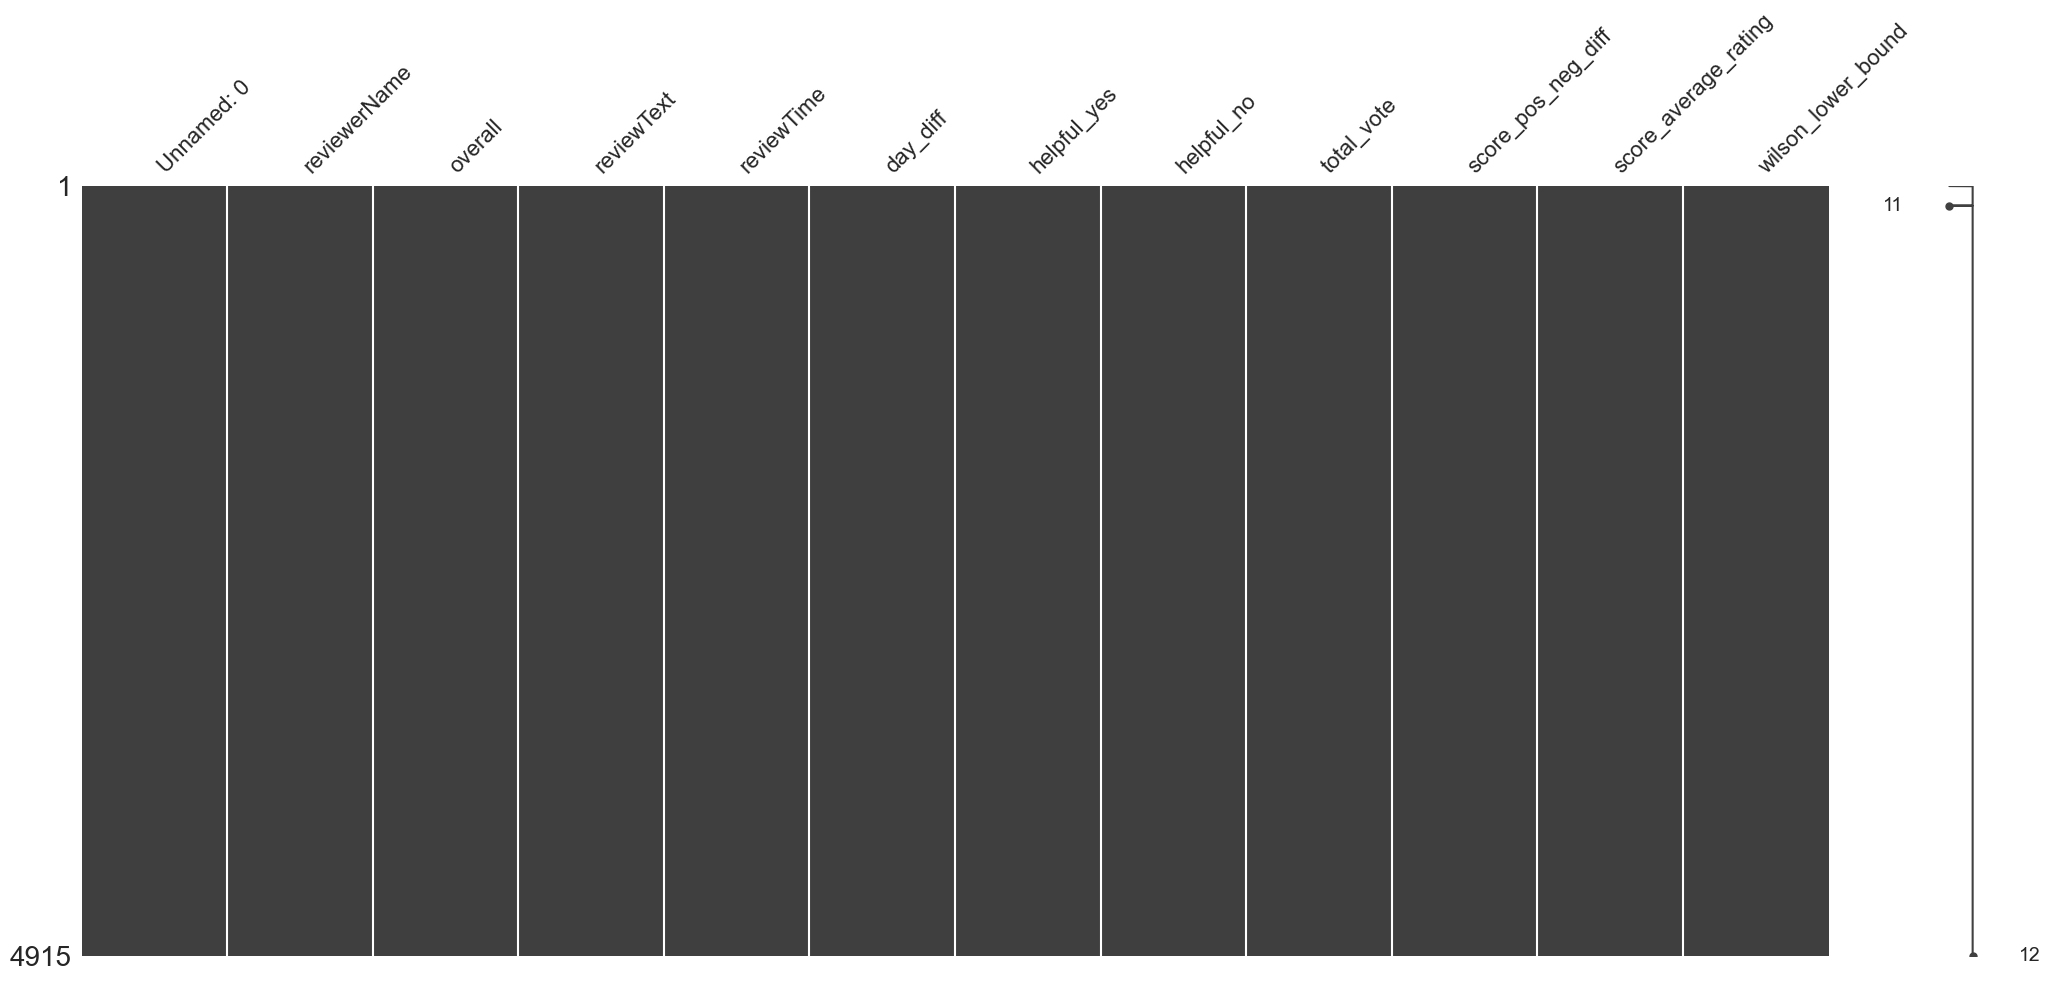

In [14]:
# Visualise missing values as a matrix
msno.matrix(analysis_df)

In [15]:
#Index of missing values
for col in columns_name:
    print(f"{col: <25}: {analysis_df[analysis_df[col].isna() == True].index}")

Unnamed: 0               : Index([], dtype='int64')
reviewerName             : Index([0], dtype='int64')
overall                  : Index([], dtype='int64')
reviewText               : Index([125], dtype='int64')
reviewTime               : Index([], dtype='int64')
day_diff                 : Index([], dtype='int64')
helpful_yes              : Index([], dtype='int64')
helpful_no               : Index([], dtype='int64')
total_vote               : Index([], dtype='int64')
score_pos_neg_diff       : Index([], dtype='int64')
score_average_rating     : Index([], dtype='int64')
wilson_lower_bound       : Index([], dtype='int64')


In [16]:
#Summarise Shape Analysis
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


### 2.2 Background Analysis

In [17]:
#Target Distribution
target_distribution = analysis_df[target_name].value_counts(normalize= True)
print(f"Target distribution:\n{target_distribution}")

Target distribution:
overall
5.0    0.797965
4.0    0.107223
1.0    0.049644
3.0    0.028891
2.0    0.016277
Name: proportion, dtype: float64


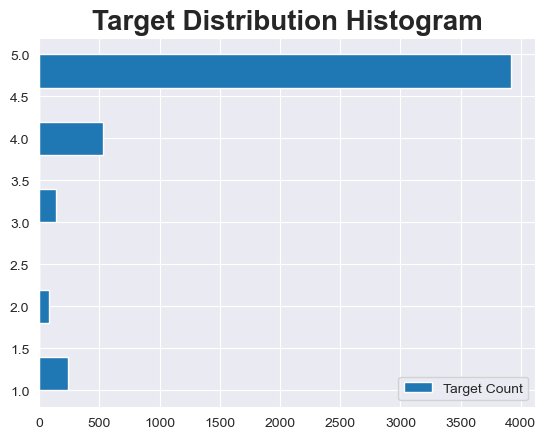

In [18]:
#Target Visualisation
plt.figure()
plt.title("Target Distribution Histogram", fontsize = 20, fontweight = 'bold')
plt.hist(x= analysis_df[target_name], align= "mid", orientation= "horizontal", histtype= "stepfilled", label= "Target Count")
plt.legend()
plt.show()

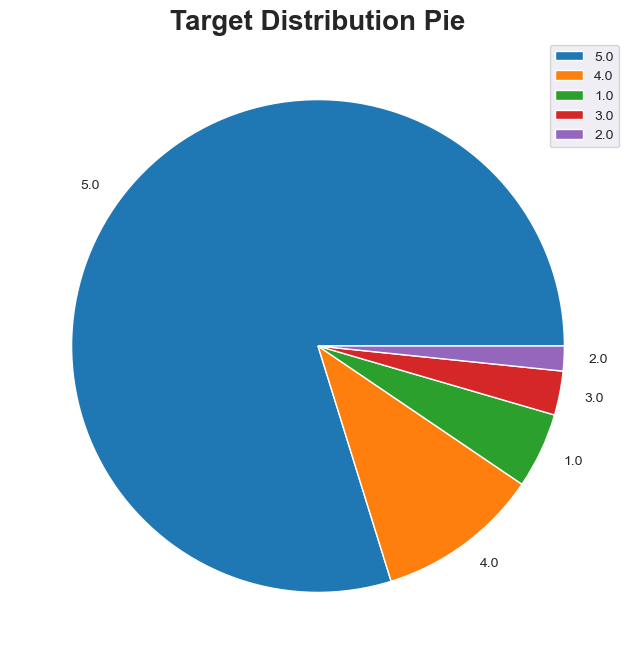

In [19]:
#Display pie plot
plt.figure(figsize = (12, 8))
plt.pie(target_distribution, labels= target_distribution.index)
plt.title("Target Distribution Pie", fontsize = 20, fontweight = 'bold')
plt.legend(loc= "best", fontsize = 10)
plt.show()

There is a clear imbalance in the classes distribution, as the grade "5.0" represent 80% of the data.
The future models must take into consideration the data imbalance.

## III. Data Preprocessing

The only relevant feature for the sentiment analysis is the "reviewText" holding all the customer comments.

In [20]:
#Create dataframe to operate the preprocessing
preprocess_df = df.copy()
preprocess_df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


### 3.1 Delete unnecessary features

In [21]:
#Select the relevant feature
select_features = ["reviewText"]
preprocess_df[select_features]

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [22]:
#Delete the unnecessary features
nlp_columns = select_features + [target_name]
print(f"NLP columns: {nlp_columns}")
preprocess_df = preprocess_df[nlp_columns]
print(f"NLP Dataframe:\n{preprocess_df}")

NLP columns: ['reviewText', 'overall']
NLP Dataframe:
                                             reviewText  overall
0                                            No issues.      4.0
1     Purchased this for my device, it worked as adv...      5.0
2     it works as expected. I should have sprung for...      4.0
3     This think has worked out great.Had a diff. br...      5.0
4     Bought it with Retail Packaging, arrived legit...      5.0
...                                                 ...      ...
4910  I bought this Sandisk 16GB Class 10 to use wit...      1.0
4911  Used this for extending the capabilities of my...      5.0
4912  Great card that is very fast and reliable. It ...      5.0
4913  Good amount of space for the stuff I want to d...      5.0
4914  I've heard bad things about this 64gb Micro SD...      5.0

[4915 rows x 2 columns]


### 3.2 Delete the missing values

In [23]:
#Visualise missing value
missing_values = preprocess_df.isna().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
reviewText    1
overall       0
dtype: int64


In [24]:
#Missing values index
for col in preprocess_df.columns:
    print(f"Column {col}: {preprocess_df[preprocess_df[col].isna()].index}")

Column reviewText: Index([125], dtype='int64')
Column overall: Index([], dtype='int64')


In [25]:
#Delete the missing value
feature_name = "reviewText"
print(f"Dataframe old shape: {preprocess_df.shape}")
preprocess_df.dropna(inplace = True)
print(f"Dataframe new shape: {preprocess_df.shape}")

Dataframe old shape: (4915, 2)
Dataframe new shape: (4914, 2)


There is various step needed in NLP data preprocessing:

    - Delete non-relevant text: email address, links, emoticons, numbers and punctuations.
    - Tokenisation: Splitting text into smaller units (token) as such words.
    - Lemmatisation: Convert words to their dictionary form by analysing the context and part-of-speech to ensure a valid word as result.
    - Delete Stopwords, common words used for syntactic value and have little sematic value such as "the", "is"", "for", "a", "in" etc.

### 3.3 StopWords

In [26]:
#Retrieve English StopWords
eng_stop_words = stopwords.words("english")
print(f"English stop words: {eng_stop_words}")

English stop words: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 's

### 3.4 Lemmatisation

In [27]:
#Lemmatiser Transformers
lemmatiser  = WordNetLemmatizer()

#Define Port Of Speech Tag Function
def get_wordnet_pos(tag: str):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatisation(text: str) -> list:
    token = word_tokenize(text)
    tags = nltk.pos_tag(token, lang="eng")
    lemma_words = [lemmatiser.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tags]
    return lemma_words


In [28]:
#Test Lemmatisation
text = "The wind running wild at noon."
lemmatisation(text)

['The', 'wind', 'run', 'wild', 'at', 'noon', '.']

### 3.5 Preprocessing Function

In [29]:
#Define the text preprocessing function
def preprocessing(text: str) -> list:

    #Regex Pattern
    #Delete email address, links, emoticons, numbers and punctuations
    pattern = re.compile(r"([a-zA-Z0-9._%+-]+@[a-zA-Z]+\.[a-zA-Z]{2,})|(http?:\S+)|(https?:\S+)|[^a-zA-Z ]+")
    cleaned_text = re.sub(pattern= pattern, repl=" ", string= text)

    #Lowercase
    lowercase_text = cleaned_text.lower().strip()

    #Lemmatisation
    lemmatised_text = lemmatisation(lowercase_text)

    #StopWords
    cleaned_text = list()
    for word in lemmatised_text:
        if word not in eng_stop_words:
            cleaned_text.append(word)

    final_text = " ".join(cleaned_text).strip()
    return final_text


In [30]:
#Test Preprocessing
test_text = "In middle of the summers, peoples are running and swimming without showing any sign of fatigue for 15 minutes. example@gmail.com or //https:historytime.com"
preprocessing(test_text)

'middle summer people run swim without show sign fatigue minute'

In [32]:
#Apply preprocessing on text
clean_feature = "preprocessReviewText"
preprocess_df[clean_feature] = preprocess_df[feature_name].map(preprocessing)
print(f"Preprocessing done:\n{preprocess_df[clean_feature]}")

Preprocessing done:
0                                                   issue
1       purchase device work advertised never much pho...
2       work expect sprung high capacity think make bi...
3       think work great diff bran gb card go south mo...
4       buy retail packaging arrive legit orange envel...
                              ...                        
4910    buy sandisk gb class use htc inspire month get...
4911    use extend capability samsung galaxy note grea...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    heard bad thing gb micro sd card crap week sk ...
Name: preprocessReviewText, Length: 4914, dtype: object


In [33]:
#Compare the original and preprocess features
preprocess_df.loc[:, [feature_name, clean_feature]]

,reviewText,preprocessReviewText
0,No issues.,issue
1,"Purchased this for my device, it worked as adv...",purchase device work advertised never much pho...
2,it works as expected. I should have sprung for...,work expect sprung high capacity think make bi...
3,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south mo...
4,"Bought it with Retail Packaging, arrived legit...",buy retail packaging arrive legit orange envel...
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,buy sandisk gb class use htc inspire month get...
4911,Used this for extending the capabilities of my...,use extend capability samsung galaxy note grea...
4912,Great card that is very fast and reliable. It ...,great card fast reliable come optional adapter...
4913,Good amount of space for the stuff I want to d...,good amount space stuff want fit gopro say


### 3.6 Split DataSet

The preprocess dataframe need to be split into training and testing set.

In [34]:
#Split the dataset into training and testing set using stratify shuffle on the target.
preprocess_train_df, preprocess_test_df = train_test_split(preprocess_df[[clean_feature, target_name]], test_size=0.2, stratify= preprocess_df[target_name], random_state=42)

print(f"Train set shape: {preprocess_train_df.shape}")
print(f"Test set shape: {preprocess_test_df.shape}")

Train set shape: (3931, 2)
Test set shape: (983, 2)


In [35]:
#Separate the feature and target
X_train = preprocess_train_df[clean_feature]
X_test = preprocess_test_df[clean_feature]
y_train = preprocess_train_df[target_name]
y_test = preprocess_test_df[target_name]

print(f"X_train set shape: {X_train.shape}")
print(f"X_test set shape: {X_test.shape}")
print(f"y_train set shape: {y_train.shape}")
print(f"y_test set shape: {y_test.shape}")

X_train set shape: (3931,)
X_test set shape: (983,)
y_train set shape: (3931,)
y_test set shape: (983,)


#### Training/Testing Set Target Distribution

In [36]:
#Training Set Target Distribution
preprocess_train_df[target_name].value_counts(normalize= True)

overall
5.0    0.798016
4.0    0.107097
1.0    0.049606
3.0    0.029000
2.0    0.016281
Name: proportion, dtype: float64

In [37]:
#Testing Set Target Distribution
preprocess_test_df[target_name].value_counts(normalize= True)

overall
5.0    0.797558
4.0    0.107833
1.0    0.049847
3.0    0.028484
2.0    0.016277
Name: proportion, dtype: float64

The target distribution between both set in respected.

### 3.7 Target Encoding

In [38]:
#Target type
y_train = preprocess_train_df[target_name]
print(f"Target type: {y_train.dtypes}")

Target type: float64


In [39]:
#Create the encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [40]:
#Visualise the label transform of the target value
for y in np.unique(y_train):
    print(f"Class: {y} -> Label {label_encoder.transform([y])[0]} ")

Class: 1.0 -> Label 0 
Class: 2.0 -> Label 1 
Class: 3.0 -> Label 2 
Class: 4.0 -> Label 3 
Class: 5.0 -> Label 4 


## IV.Token Visualisation

### 4.1 WordCloud

Display the word often associate to each target value.

In [263]:
# Download mask for wordcloud
mask_path = kagglehub.dataset_download("timothyabwao/wordcloud-masks")

print("Path to dataset files:", mask_path)
mask_png = os.listdir(mask_path)
print(f"Element: {os.listdir(mask_path)}")

Path to dataset files: C:\Users\stanl\.cache\kagglehub\datasets\timothyabwao\wordcloud-masks\versions\1
Element: ['1.png', '2.png', '3.png', '4.png', '5.png']


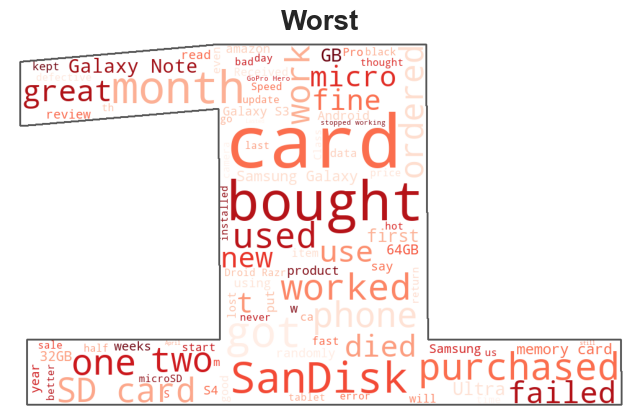

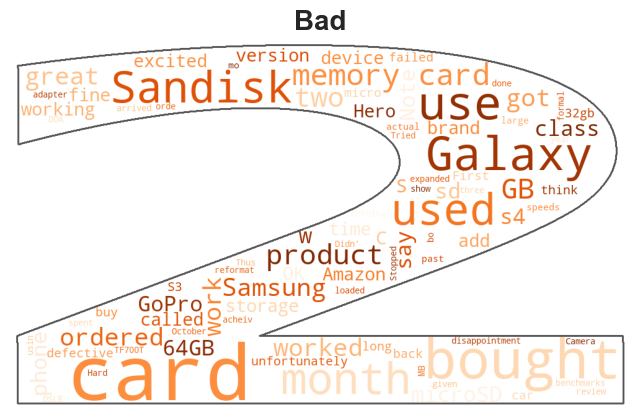

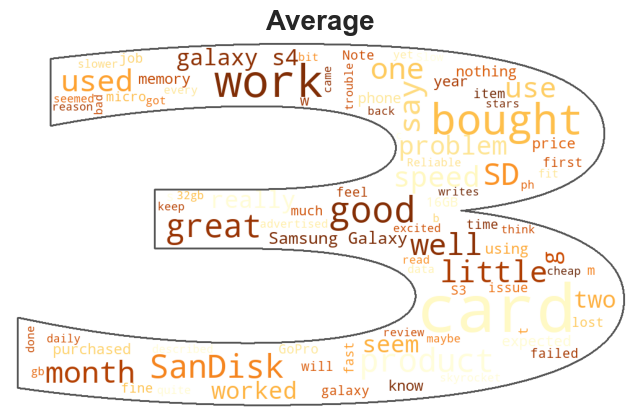

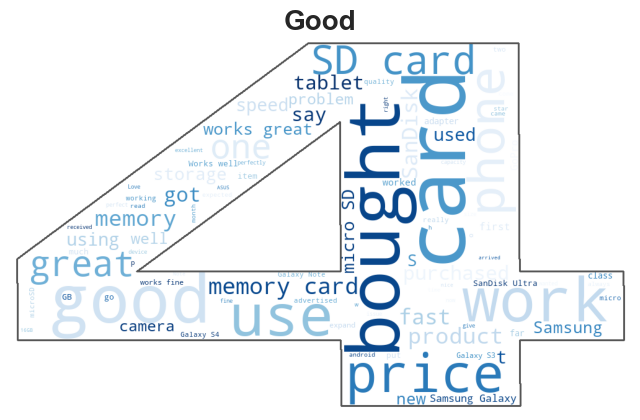

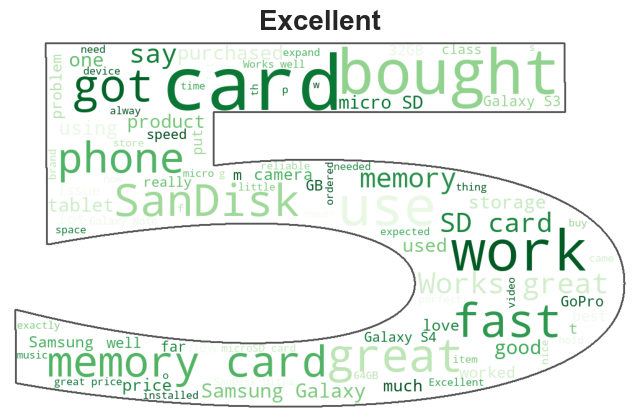

In [272]:
#Display the WordCloud
for num, png, cmap, grade in zip(range(1, 6), mask_png, ["Reds"] + ["Oranges"] + ["YlOrBr"] + ["Blues"] + ["Greens"], ["Worst", "Bad", "Average", "Good", "Excellent"]):

    #Retreive the text associate to the review grade
    text = preprocess_df[preprocess_df[target_name] == num][feature_name].to_string()

    #Get the image mask
    image = Image.open(os.path.join(path, png))
    mask = np.array(image)

    #Create the WordCloud
    word_cloud = WordCloud(
        mask= mask,
        background_color="#fff",
        max_words= 90,
        colormap= cmap,
        height = 500,
        width = 800,
        contour_width= 3,
        contour_color= "#555",

    ).generate(text)

    #Plot the WordCloud
    plt.figure(figsize=(8, 10))
    plt.title(f"{grade}", fontsize=20, fontweight="bold")
    plt.imshow(word_cloud, cmap=cmap)
    plt.axis("off")
    plt.grid(False)
    plt.show()


## V. Vectorisation

Currently, the reviews are saved as a list of tokens (words) but each token must be converts into numbers and express with higher level of complexity, to reveal their importance and express the reviewer feeling. A new dimension is created by transforming a scalar (token) into a vector.
It exists various ways to execute this operation:

    - CountVectorisation.
    - TFIDFVectorisation.
    - Embedding.

### 5.1 Bag of Word

The "CountVectorizer" transformer convert the text into a numerical matrix by counting each token (word) occurrences in the document.

In [43]:
count_vectoriser = CountVectorizer()
count_vectoriser.fit(X_train)
count_vectoriser.transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 82790 stored elements and shape (3931, 5479)>

### 5.2 Term Frequency-Inverse Document Frequency (TF-IDF)

The "TfidfVectorizer" convert the raw text in numerical matrix by assigns weights based on a word's importance across the entire collection of documents, it calculates a score for each word that reflects both its frequency within a single document and its rarity across the entire corpus.

In [44]:
tfidf_vectoriser = TfidfVectorizer()
tfidf_vectoriser.fit(X_train)
tfidf_vectoriser.transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 82790 stored elements and shape (3931, 5479)>

### 5.3 Deep Learning Tokenisation

In [45]:
#Parameters
ENCODING = "utf-8"
SEQ_LENGTH = 256
BATCH_SIZE = 64

#### 5.3.1 VOCABULARY SIZE

In [46]:
#Count the occurrences of each words
counter = Counter()
for text in X_train:
    tokens = text.split(" ")
    counter.update(tokens)

word_counts = counter.most_common()

#Visualise the most common words table
df_count = pd.DataFrame(word_counts, columns=["words", "count"]).sort_values("count", ascending=False)
print(f"Most common words:\n{df_count}")

Most common words:
          words  count
0          card   4484
1          work   2249
2           use   1760
3         phone   1551
4            gb   1404
...         ...    ...
5456   superior      1
5457  completly      1
5458       drum      1
5459       grat      1
5460     legacy      1

[5497 rows x 2 columns]


In [47]:
df_count[df_count["count"] >= 2]

,words,count
0,card,4484
1,work,2249
2,use,1760
3,phone,1551
4,gb,1404
...,...,...
2868,selfies,2
2867,fourth,2
2866,dji,2
2865,webpage,2


In [48]:
#Vocabulary size
MAX_TOKENS = len(df_count[df_count["count"] >= 2])
print(f"Max tokens: {MAX_TOKENS}")

Max tokens: 2879


#### 5.3.2 SEQUENCE LENGTH

In [278]:
#Determine sequence length
length = [len(text.split(" ")) for text in X_train]

min_len     = np.min(length)
max_len     = np.max(length)
mean_len    = np.mean(length)
median_len  = np.median(length)
q1 = np.percentile(length, 25)
q3 = np.percentile(length, 75)
std_len     = np.std(length)

print(f"Minimum text length: {min_len}")
print(f"Maximum text length: {max_len}")
print(f"Mean text length: {mean_len}")
print(f"First Quartile: {q1}")
print(f"Median text length: {median_len}")
print(f"Third Quartile: {q3}")
print(f"Std text length: {std_len}")

Minimum text length: 1
Maximum text length: 778
Mean text length: 25.07835156448741
First Quartile: 12.0
Median text length: 16.0
Third Quartile: 27.0
Std text length: 31.073688556531273


<Figure size 640x480 with 0 Axes>

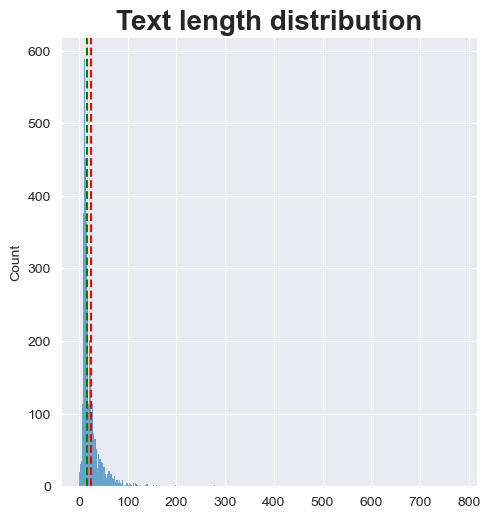

In [286]:
#Display the text length on histogram
plt.figure()
sns.displot(length)
plt.axvline(mean_len, color="r", linestyle="dashed", label= f"Mean: {mean_len:.2f}")
plt.axvline(median_len, color="g", linestyle="--", label= f"Median: {median_len:.2f}")
plt.title("Text length distribution", fontsize=20, fontweight="bold")
plt.show()

Select a sequence length that regroup most of the sequence.

In [51]:
#New Sequence Length
SEQ_LEN = 128

#### 5.3.3 TextVectorization Layer

In [52]:
#Instantiate the TextVectorization object
token_layer = TextVectorization(max_tokens= MAX_TOKENS, output_mode= "int", encoding= ENCODING, output_sequence_length= SEQ_LEN)

In [53]:
#Define the TextVectorization object
token_layer.adapt(X_train)
voc = token_layer.get_vocabulary()
print(f"{len(voc)} unique tokens")
print(f"Vocabulary: {voc}")

2879 unique tokens
Vocabulary: ['', '[UNK]', np.str_('card'), np.str_('work'), np.str_('use'), np.str_('phone'), np.str_('gb'), np.str_('great'), np.str_('memory'), np.str_('buy'), np.str_('sandisk'), np.str_('get'), np.str_('sd'), np.str_('one'), np.str_('fast'), np.str_('galaxy'), np.str_('good'), np.str_('price'), np.str_('speed'), np.str_('problem'), np.str_('samsung'), np.str_('storage'), np.str_('tablet'), np.str_('need'), np.str_('well'), np.str_('video'), np.str_('product'), np.str_('would'), np.str_('go'), np.str_('camera'), np.str_('format'), np.str_('class'), np.str_('issue'), np.str_('music'), np.str_('say'), np.str_('device'), np.str_('read'), np.str_('like'), np.str_('file'), np.str_('purchase'), np.str_('micro'), np.str_('adapter'), np.str_('transfer'), np.str_('time'), np.str_('note'), np.str_('write'), np.str_('take'), np.str_('recommend'), np.str_('come'), np.str_('space'), np.str_('picture'), np.str_('new'), np.str_('data'), np.str_('much'), np.str_('store'), np.str_

#### 5.3.4 Embedding Layer

In [54]:
#Define the embedding layer dimension
EMB_DIM = int(np.power(MAX_TOKENS, 1/4))
print(f"NEW_EMB_DIM: {EMB_DIM}")

NEW_EMB_DIM: 7


In [55]:
#Instanciate embedding layer
embedder_layer = Embedding(input_dim= MAX_TOKENS, output_dim= EMB_DIM)

## VI. Resampling

The dataset is imbalanced and can lead to biased model predictions and poor performance on minority classes. Various techniques can be used to reduce this situation, such as resampling. Resampling is divide into two main categories:

    - Undersampling: Balance the uneven dataset by decreasing the size of the majority class and keeping the data of the minory class. Not adapted for NLP sentiment analysis as it will product information loss and possible decrease in the model performance.
    - Oversampling: Balance the uneven dataset by increaseing the size of the minory class and maintain all data of the majority class. It is more adapted for NLP sentiment analysis by avoiding losing information and improving model perfromance effectively.

The Synthetic Minority Over-sampling Technique (SMOTE) is recommended for NLP sentiment analysis, as it will generate synthethic data; which adds variability and increase the system performance, instead of the ramdom oversampling, which duplicate the existing data and might increase the risk of overfitting.

In [56]:
#Define the SMOTE transformer
smote = SMOTE(random_state= 15)
X_train_res, y_train_res = smote.fit_resample(tfidf_vectoriser.transform(X_train), label_encoder.transform(y_train))

#Visualise the difference in shape between the previous and resample dataset;
print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train shape: {y_train.shape}")
print()
print(f"Resample Vectorise X_train shape: {X_train_res.shape}")
print(f"Resample Vectorise y_train shape: {y_train_res.shape}")

Original X_train shape: (3931,)
Original y_train shape: (3931,)

Resample Vectorise X_train shape: (15685, 5479)
Resample Vectorise y_train shape: (15685,)


## VII. Model

Objective: Create a machine learning model reaching the desired performance.

    Define the evaluation function
    Train various model
    Optimise the model (GridSearchCV)
    Analyse error and modify the pre-processing to achieve better performance
    Learning Curve and Decision from those performances.


### 7.1 Machine Learning Evaluation Function

In [57]:
#Create the evaluation function
def ml_model_evaluation(name: str, model) -> None:
    #Display model name
    print(f"Evaluating: {name}")

    #Label Encoding
    y_train_enc     = label_encoder.transform(y_train)
    y_test_enc      = label_encoder.transform(y_test)

    #Features Vectorisation
    #CountVectorizer
    X_train_count   = count_vectoriser.transform(X_train)
    X_test_count    = count_vectoriser.transform(X_test)

    #TfidfVectorizer
    X_train_tfidf   = tfidf_vectoriser.transform(X_train)
    X_test_tfidf    = tfidf_vectoriser.transform(X_test)

    #Resampling
    X_train_count_res, y_train_count_res   = smote.fit_resample(X_train_count, y_train_enc)
    X_train_tfidf_res, y_train_tfidf_res   = smote.fit_resample(X_train_tfidf, y_train_enc)


    #Create Dictionary of the model
    model_dict = {
        "CountVectoriser": (X_train_count_res, X_test_count, y_train_count_res),
        "TfidfVectoriser": (X_train_tfidf_res, X_test_tfidf, y_train_tfidf_res),
    }

    for vect, data in model_dict.items():
        #Retrieve the data
        X_train_vect, X_test_vect, y_train_vect,  = data

        #Train the model
        model.fit(X_train_vect, y_train_vect)

        #Predict the output
        y_pred = model.predict(X_test_vect)

        #Visualise the confusion matrix and classification report
        print(f"{name}\n{vect}")
        print(classification_report(y_test_enc, y_pred))
        print(f"Precision: {precision_score(y_test_enc, y_pred, average= "weighted")*100:.2f}%")
        print(f"Recall: {recall_score(y_test_enc, y_pred, average= "weighted")*100:.2f}%")
        print(f"F1: {f1_score(y_test_enc, y_pred, average="weighted")*100:.2f}%")
        print(f"Accuracy: {accuracy_score(y_test_enc, y_pred)*100:.2f}%")
        print()

        fig, axs = plt.subplots(nrows=2, ncols=1, figsize= (8, 10))

        sns.heatmap(confusion_matrix(y_test_enc, y_pred), annot= True, fmt= "g", cmap= "Blues", cbar= False, ax= axs[0])
        axs[0].set_title(f"{name} {vect}: Confusion Matrix", fontsize=12, fontweight="bold")
        axs[0].set_xlabel("True Class")
        axs[0].set_ylabel("Predicted Class")


        N, train_score, val_score = learning_curve(model,
                                                    X_train_vect,
                                                    y_train_vect,
                                                    train_sizes= np.linspace(0.1, 1.0, 5),
                                                    cv=5,
                                                    scoring="f1_weighted", #Ensuring performance on minority classes.
                                                    )

        axs[1].plot(train_score.mean(axis= 1), label="Training score")
        axs[1].plot(val_score.mean(axis= 1), label="Validation score")
        axs[1].legend(loc="best")
        axs[1].set_title(f"{name} {vect}: Learning Curves", fontsize=12, fontweight="bold")
        axs[1].set_xlabel("Training Iteration")
        axs[1].set_ylabel("F1 Weighted Score")

        # Adjust layout to prevent titles/labels overlapping
        plt.tight_layout()
        plt.show()
        print()

Evaluating: Logistic Regression
Logistic Regression
CountVectoriser
              precision    recall  f1-score   support

           0       0.34      0.47      0.40        49
           1       0.07      0.06      0.06        16
           2       0.10      0.18      0.12        28
           3       0.16      0.19      0.17       106
           4       0.87      0.81      0.84       784

    accuracy                           0.70       983
   macro avg       0.31      0.34      0.32       983
weighted avg       0.74      0.70      0.71       983

Precision: 73.61%
Recall: 69.58%
F1: 71.40%
Accuracy: 69.58%



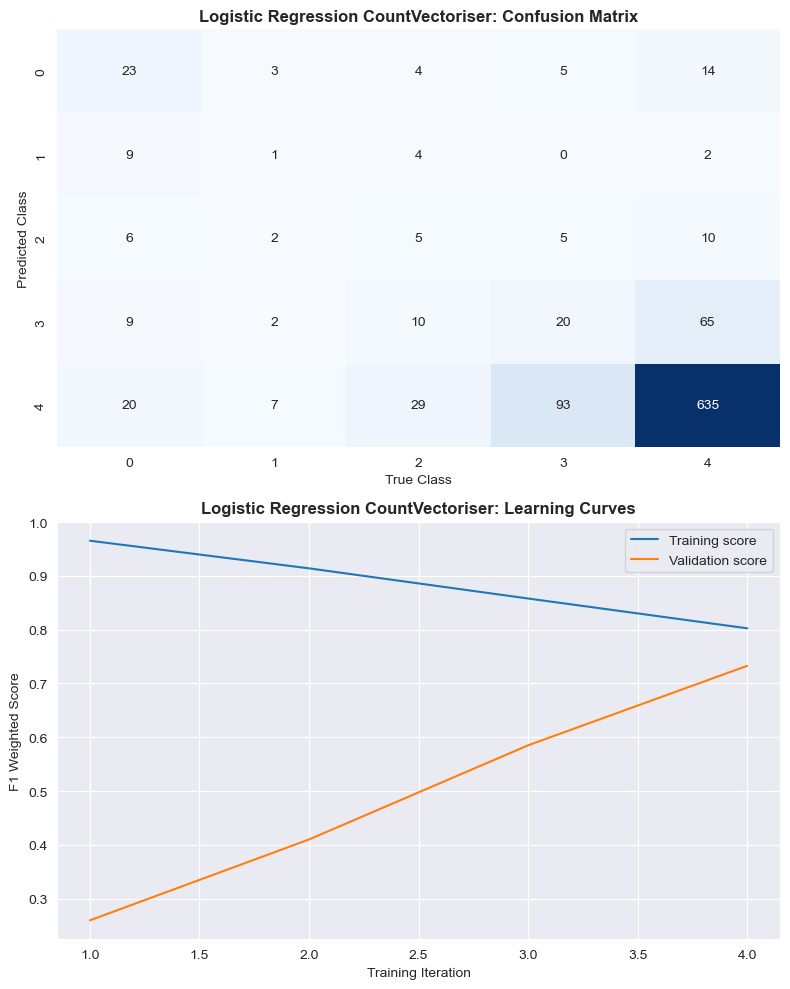


Logistic Regression
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        49
           1       0.20      0.19      0.19        16
           2       0.13      0.18      0.15        28
           3       0.21      0.29      0.24       106
           4       0.89      0.82      0.85       784

    accuracy                           0.72       983
   macro avg       0.39      0.43      0.41       983
weighted avg       0.77      0.72      0.74       983

Precision: 76.73%
Recall: 72.43%
F1: 74.31%
Accuracy: 72.43%



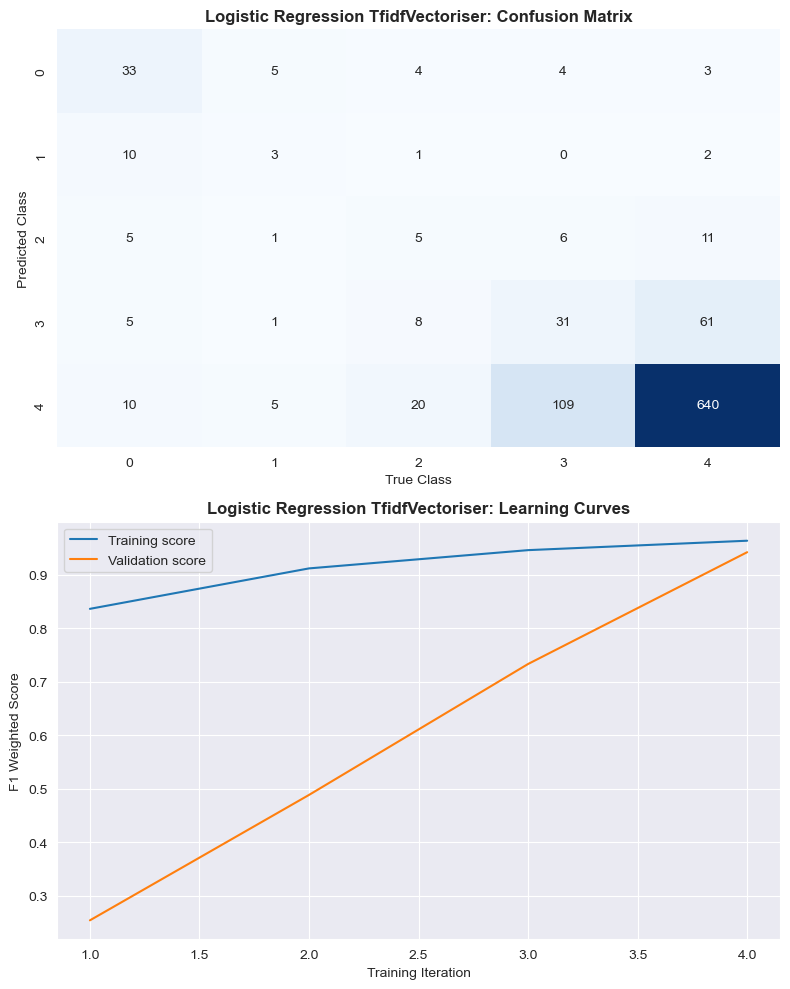

In [58]:
#Test Evaluation Function
warnings.filterwarnings("ignore")
ml_model_evaluation("Logistic Regression", LogisticRegression())

In [59]:
#Create list of machine learning model (Logistic Regression, Naive Bayes, Support Vector Machine,  Decision Trees, Random Forest, AdaBoost, XGBoost)

#List of machine learning model names
ml_model_names = ["Logistic Regression", "Naive Bayes",  "Support Vector Machine", "Decision Trees", "Random Forest", "AdaBoost", "XGBoost"]

#Define the machine learning model
lr_model = LogisticRegression(random_state= 15)
nb_model = MultinomialNB()
svm_model = SVC(probability=True, random_state= 15)
dt_model = DecisionTreeClassifier(random_state= 15)
rf_model = RandomForestClassifier(random_state= 15)
adaboost_model = AdaBoostClassifier(random_state= 15)
xgb_model = XGBClassifier(random_state= 15)

#List of machine learning model
ml_model = [lr_model, nb_model, svm_model, dt_model, rf_model, adaboost_model, xgb_model]

Evaluating: Logistic Regression
Logistic Regression
CountVectoriser
              precision    recall  f1-score   support

           0       0.34      0.47      0.40        49
           1       0.07      0.06      0.06        16
           2       0.10      0.18      0.12        28
           3       0.16      0.19      0.17       106
           4       0.87      0.81      0.84       784

    accuracy                           0.70       983
   macro avg       0.31      0.34      0.32       983
weighted avg       0.74      0.70      0.71       983

Precision: 73.61%
Recall: 69.58%
F1: 71.40%
Accuracy: 69.58%



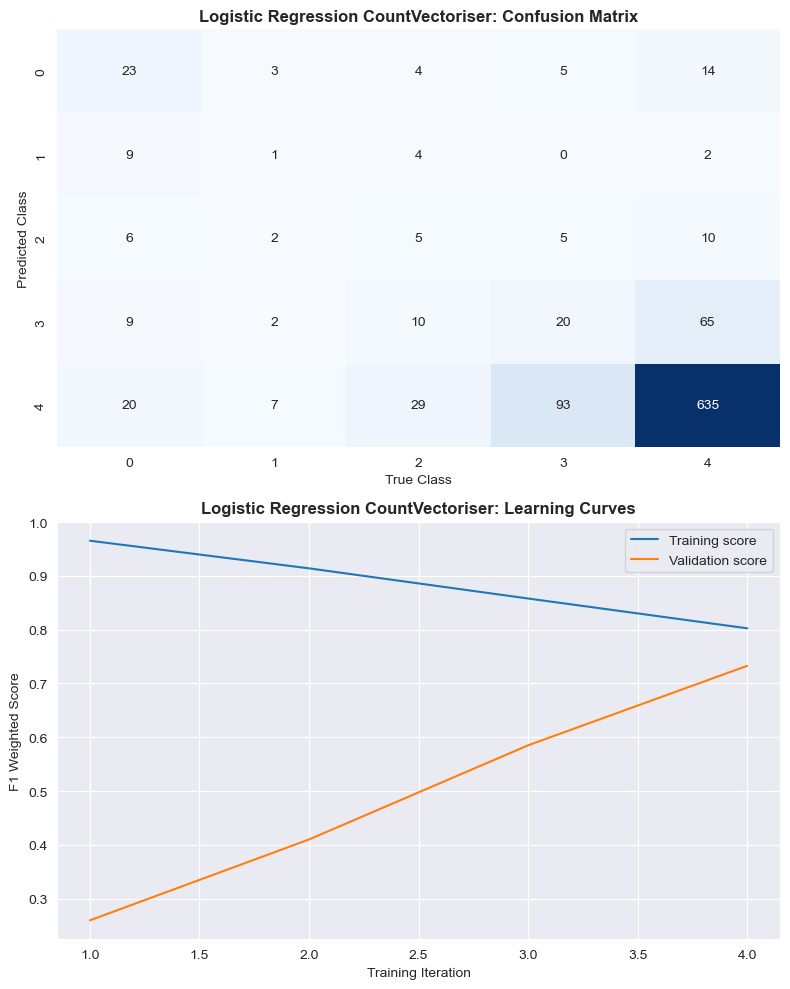


Logistic Regression
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        49
           1       0.20      0.19      0.19        16
           2       0.13      0.18      0.15        28
           3       0.21      0.29      0.24       106
           4       0.89      0.82      0.85       784

    accuracy                           0.72       983
   macro avg       0.39      0.43      0.41       983
weighted avg       0.77      0.72      0.74       983

Precision: 76.73%
Recall: 72.43%
F1: 74.31%
Accuracy: 72.43%



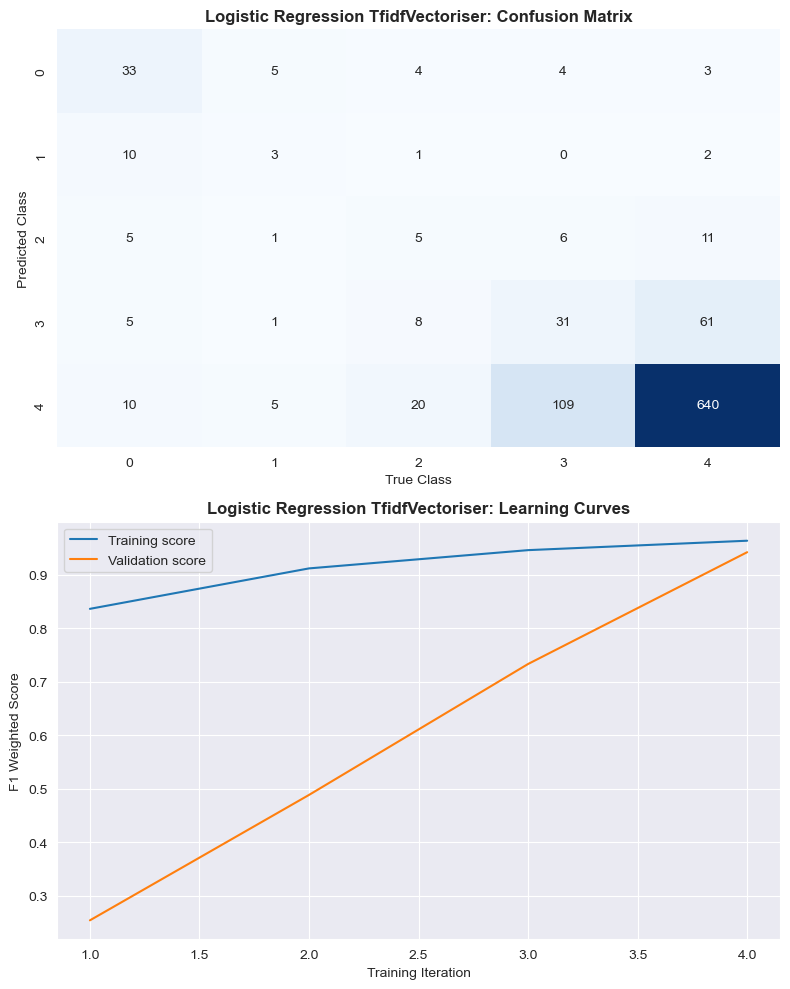


Evaluating: Naive Bayes
Naive Bayes
CountVectoriser
              precision    recall  f1-score   support

           0       0.42      0.63      0.51        49
           1       0.40      0.12      0.19        16
           2       0.07      0.04      0.05        28
           3       0.23      0.20      0.21       106
           4       0.87      0.89      0.88       784

    accuracy                           0.77       983
   macro avg       0.40      0.38      0.37       983
weighted avg       0.75      0.77      0.76       983

Precision: 75.12%
Recall: 76.60%
F1: 75.61%
Accuracy: 76.60%



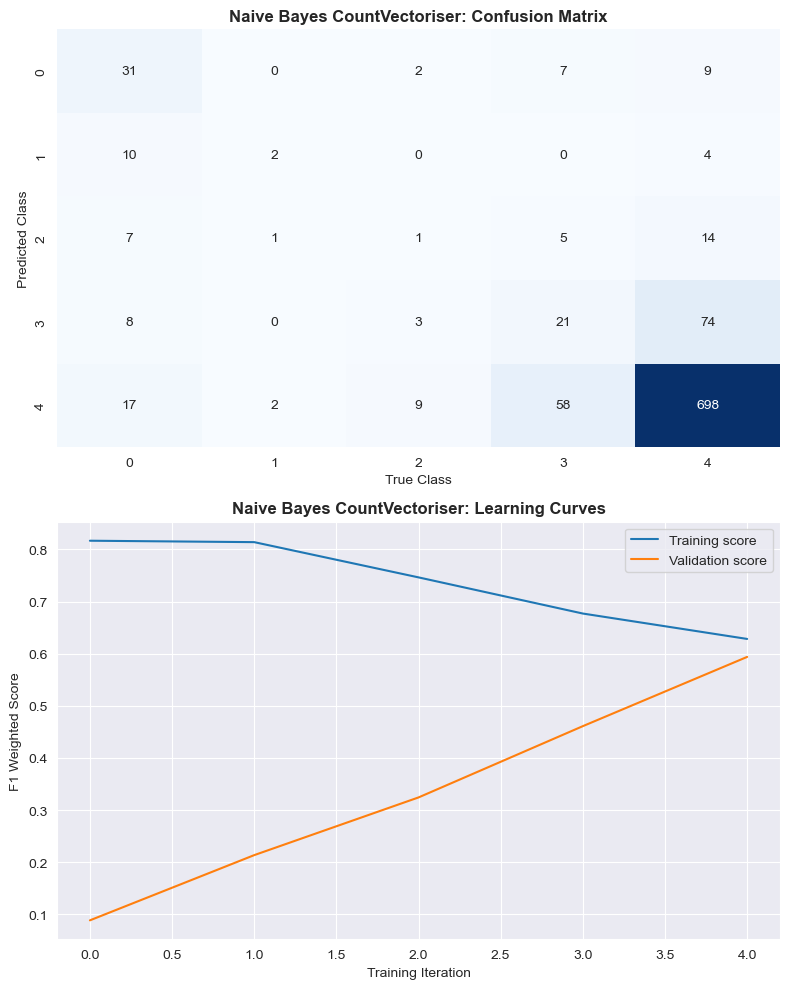


Naive Bayes
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.35      0.61      0.44        49
           1       0.04      0.06      0.05        16
           2       0.06      0.18      0.09        28
           3       0.15      0.27      0.19       106
           4       0.90      0.68      0.77       784

    accuracy                           0.61       983
   macro avg       0.30      0.36      0.31       983
weighted avg       0.75      0.61      0.66       983

Precision: 75.15%
Recall: 60.94%
F1: 66.40%
Accuracy: 60.94%



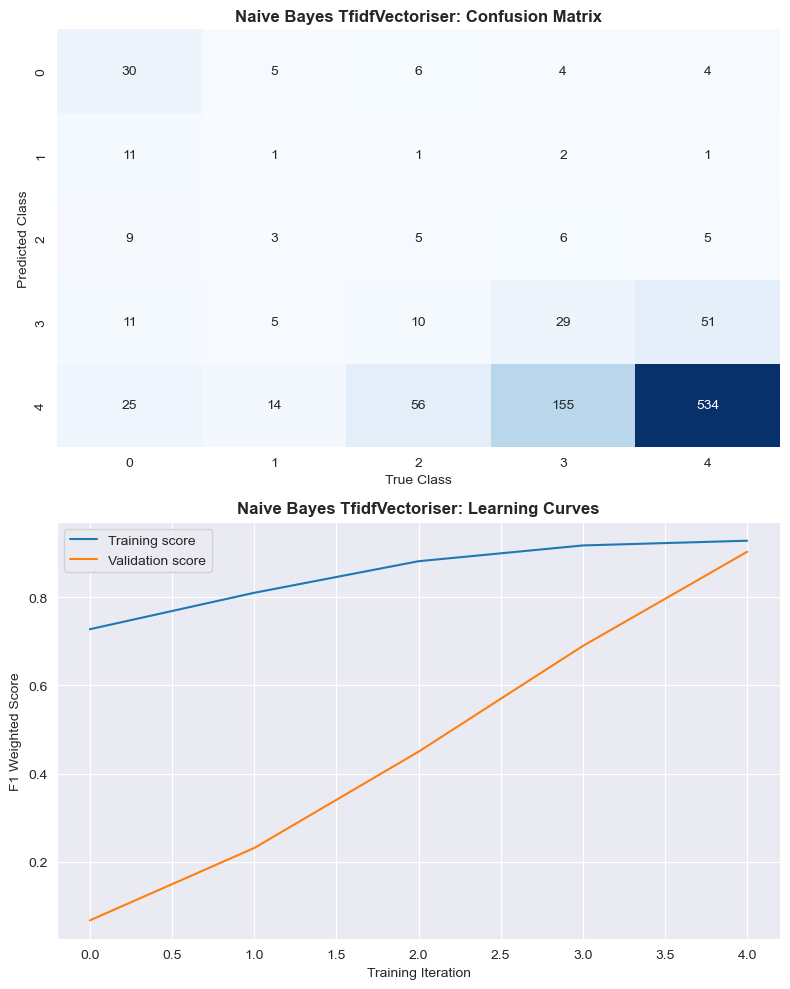


Evaluating: Support Vector Machine
Support Vector Machine
CountVectoriser
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        49
           1       0.14      0.06      0.09        16
           2       0.06      0.04      0.04        28
           3       0.17      0.07      0.10       106
           4       0.82      0.93      0.87       784

    accuracy                           0.76       983
   macro avg       0.28      0.25      0.25       983
weighted avg       0.69      0.76      0.72       983

Precision: 68.89%
Recall: 75.69%
F1: 71.70%
Accuracy: 75.69%



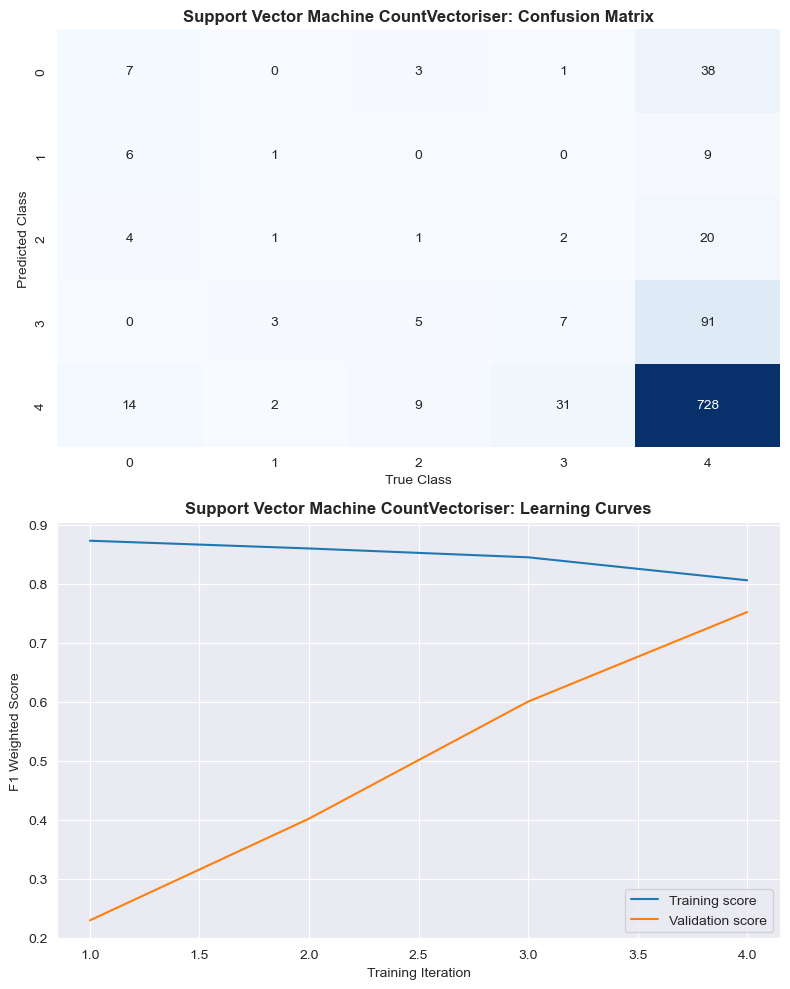


Support Vector Machine
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.39      0.18      0.25        49
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00       106
           4       0.81      0.99      0.90       784

    accuracy                           0.80       983
   macro avg       0.24      0.24      0.23       983
weighted avg       0.67      0.80      0.73       983

Precision: 66.82%
Recall: 80.26%
F1: 72.63%
Accuracy: 80.26%



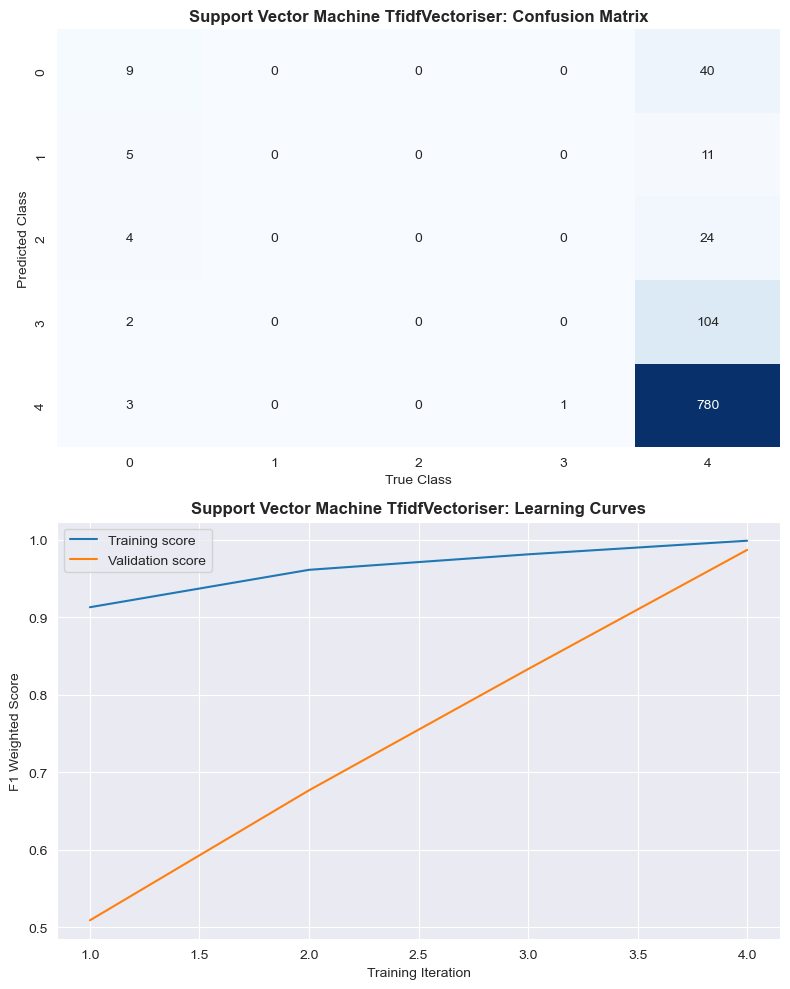


Evaluating: Decision Trees
Decision Trees
CountVectoriser
              precision    recall  f1-score   support

           0       0.16      0.31      0.21        49
           1       0.03      0.12      0.04        16
           2       0.06      0.18      0.09        28
           3       0.14      0.22      0.17       106
           4       0.86      0.63      0.73       784

    accuracy                           0.55       983
   macro avg       0.25      0.29      0.25       983
weighted avg       0.71      0.55      0.61       983

Precision: 71.16%
Recall: 54.63%
F1: 61.12%
Accuracy: 54.63%



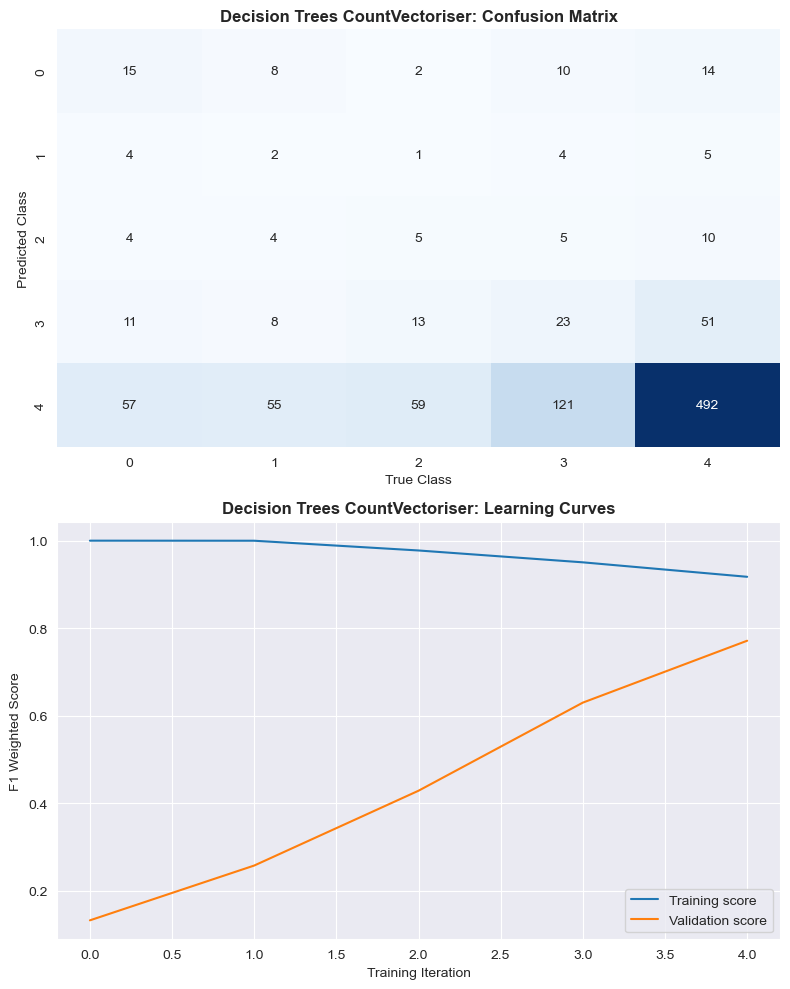


Decision Trees
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.18      0.27      0.21        49
           1       0.07      0.06      0.06        16
           2       0.04      0.04      0.04        28
           3       0.15      0.20      0.17       106
           4       0.85      0.79      0.82       784

    accuracy                           0.67       983
   macro avg       0.26      0.27      0.26       983
weighted avg       0.71      0.67      0.69       983

Precision: 70.81%
Recall: 66.73%
F1: 68.59%
Accuracy: 66.73%



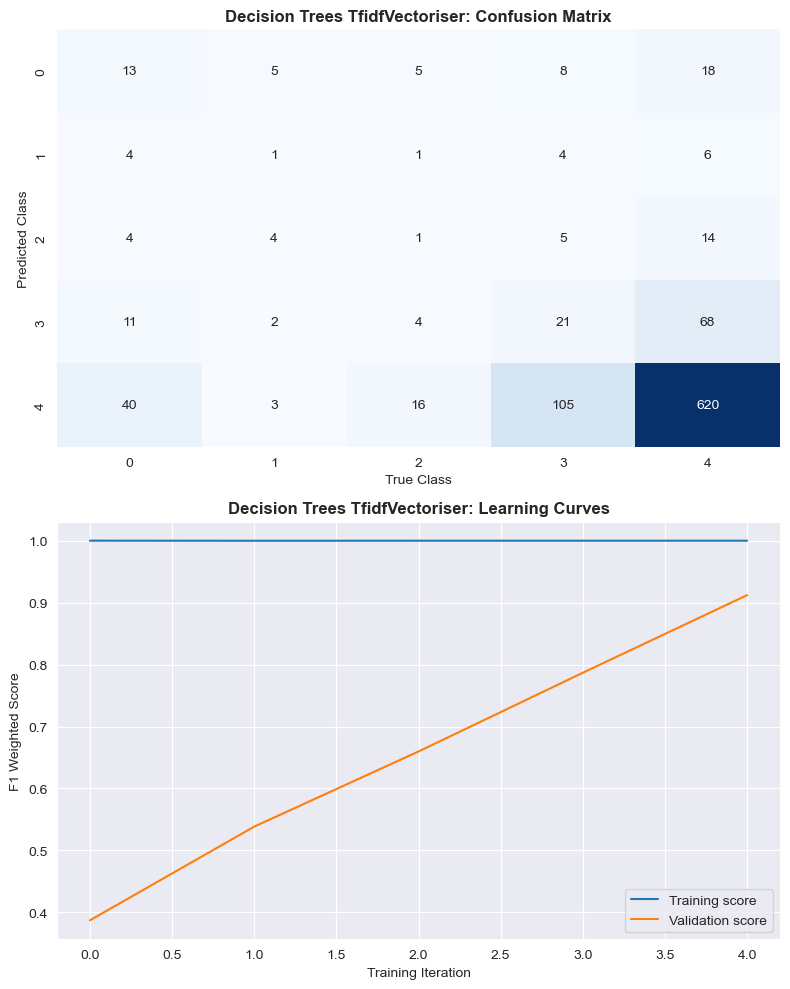


Evaluating: Random Forest
Random Forest
CountVectoriser
              precision    recall  f1-score   support

           0       0.31      0.35      0.33        49
           1       0.00      0.00      0.00        16
           2       0.08      0.04      0.05        28
           3       0.14      0.11      0.12       106
           4       0.83      0.86      0.84       784

    accuracy                           0.72       983
   macro avg       0.27      0.27      0.27       983
weighted avg       0.69      0.72      0.70       983

Precision: 69.25%
Recall: 71.62%
F1: 70.37%
Accuracy: 71.62%



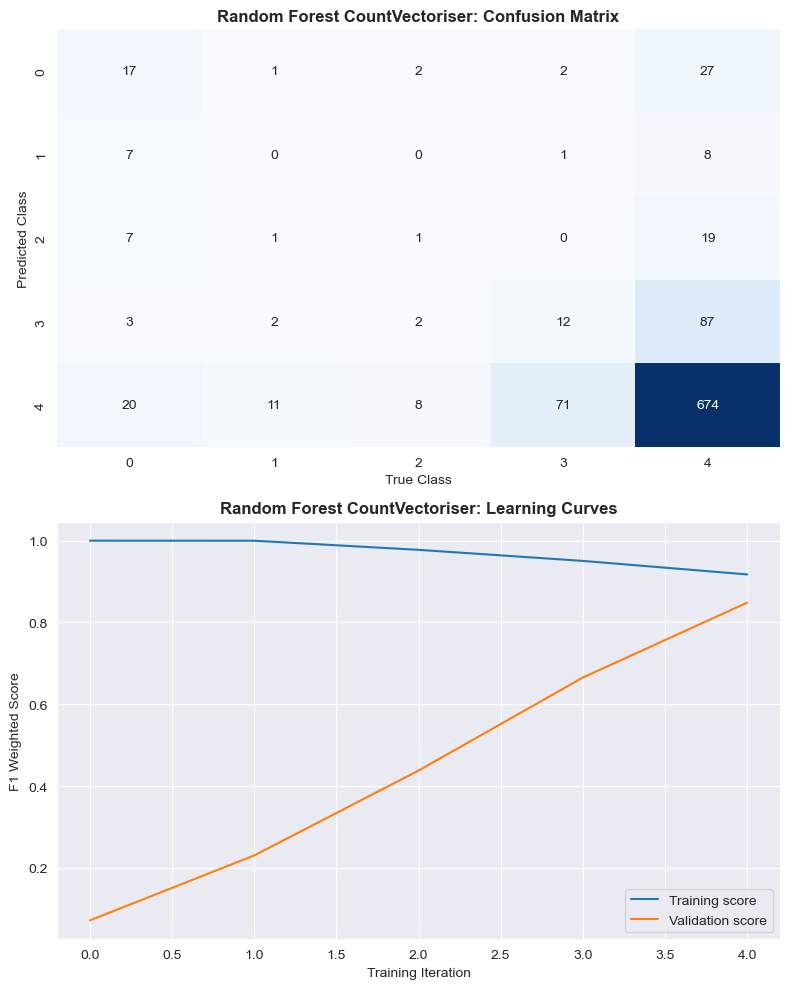


Random Forest
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.54      0.31      0.39        49
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        28
           3       0.40      0.08      0.13       106
           4       0.83      0.99      0.90       784

    accuracy                           0.81       983
   macro avg       0.35      0.27      0.28       983
weighted avg       0.73      0.81      0.75       983

Precision: 72.92%
Recall: 80.98%
F1: 75.04%
Accuracy: 80.98%



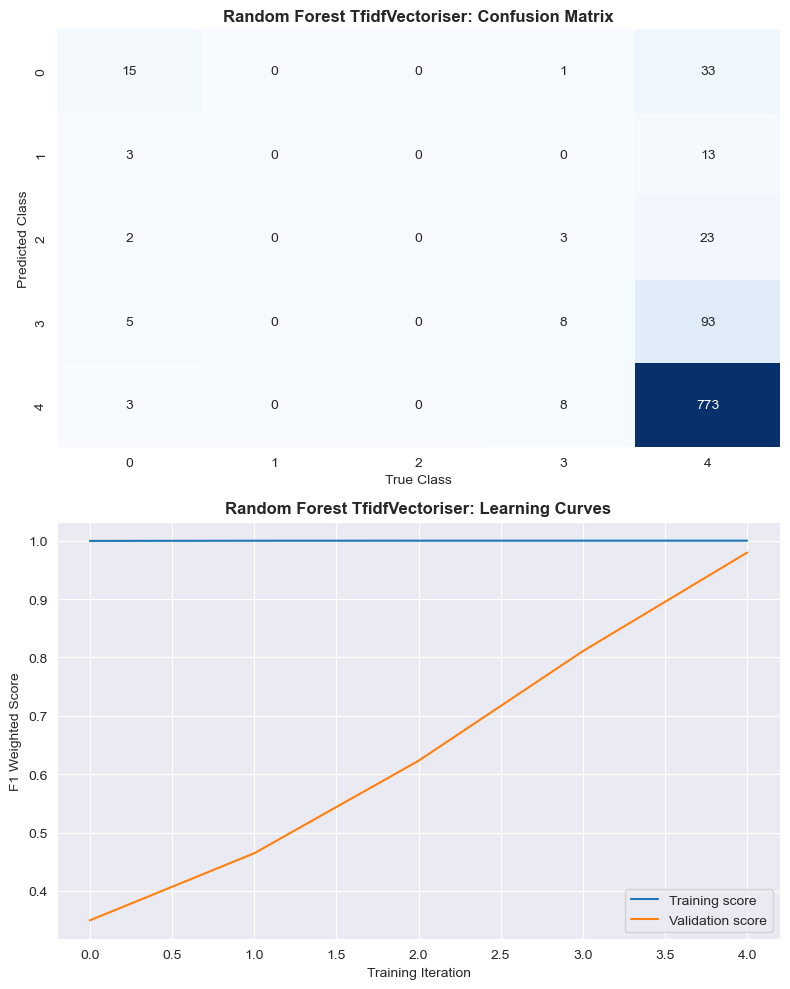


Evaluating: AdaBoost
AdaBoost
CountVectoriser
              precision    recall  f1-score   support

           0       0.16      0.47      0.24        49
           1       0.03      0.19      0.05        16
           2       0.03      0.18      0.04        28
           3       0.12      0.07      0.09       106
           4       0.86      0.52      0.65       784

    accuracy                           0.45       983
   macro avg       0.24      0.28      0.21       983
weighted avg       0.71      0.45      0.54       983

Precision: 70.81%
Recall: 45.07%
F1: 53.78%
Accuracy: 45.07%



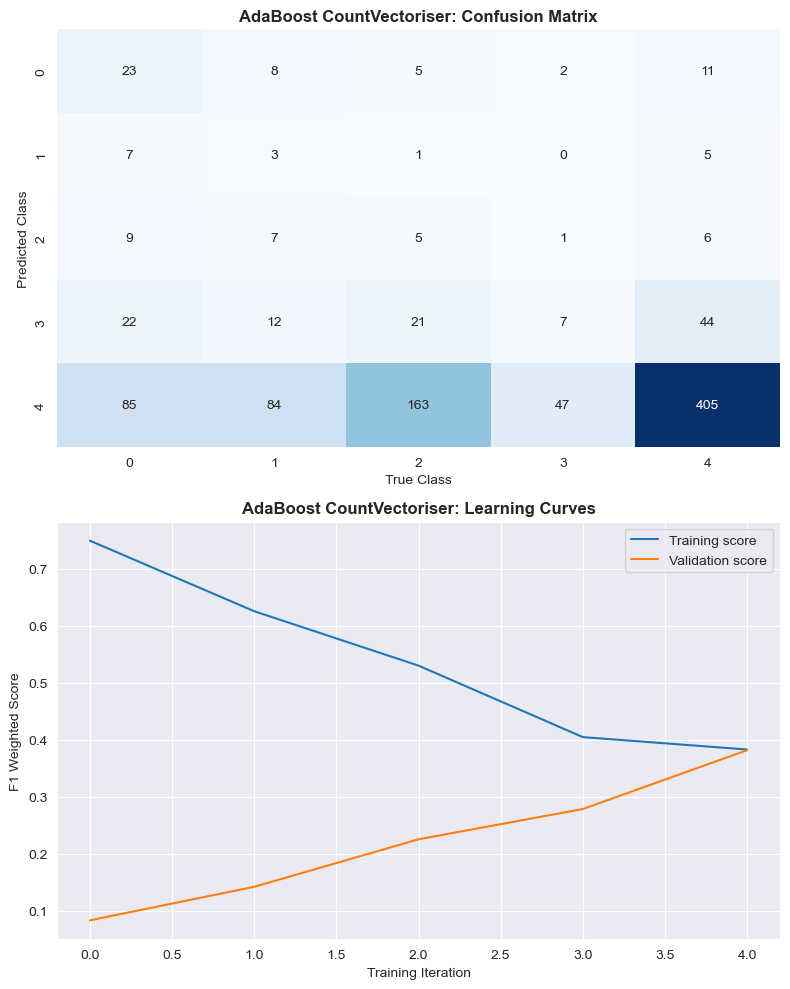


AdaBoost
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.41      0.29      0.34        49
           1       0.12      0.06      0.08        16
           2       0.07      0.36      0.11        28
           3       0.13      0.42      0.20       106
           4       0.87      0.50      0.64       784

    accuracy                           0.47       983
   macro avg       0.32      0.33      0.27       983
weighted avg       0.73      0.47      0.55       983

Precision: 73.37%
Recall: 47.10%
F1: 55.07%
Accuracy: 47.10%



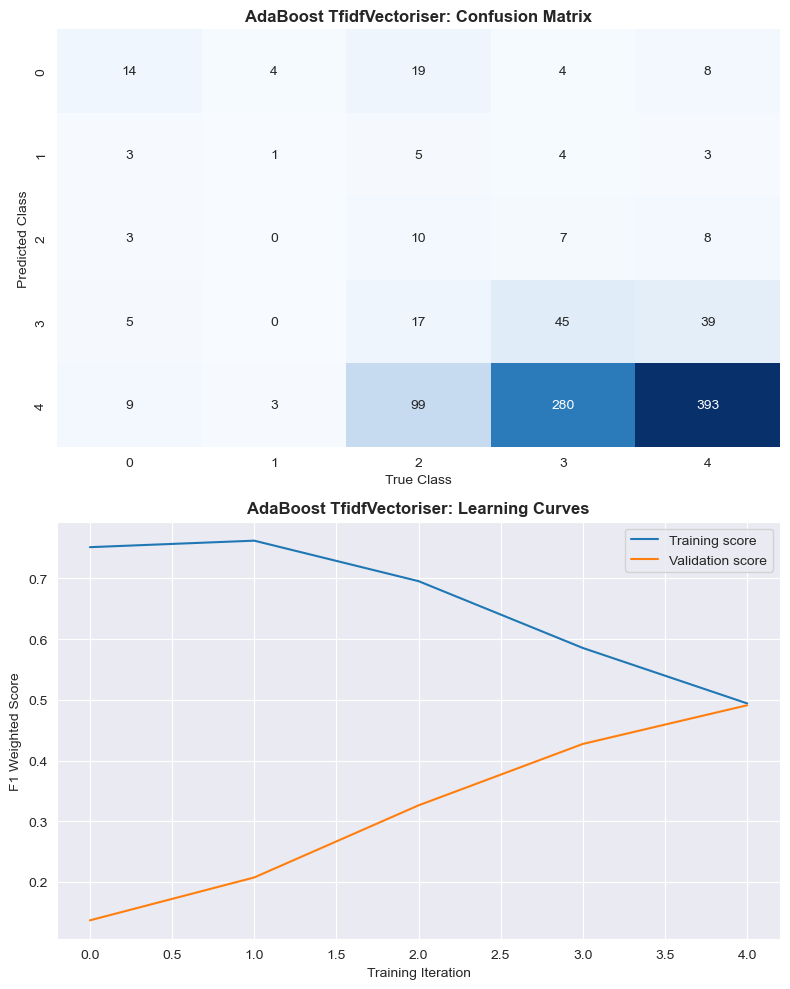


Evaluating: XGBoost
XGBoost
CountVectoriser
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        49
           1       0.40      0.12      0.19        16
           2       0.33      0.07      0.12        28
           3       0.24      0.04      0.07       106
           4       0.84      0.98      0.90       784

    accuracy                           0.81       983
   macro avg       0.46      0.32      0.34       983
weighted avg       0.74      0.81      0.76       983

Precision: 73.60%
Recall: 81.08%
F1: 75.71%
Accuracy: 81.08%



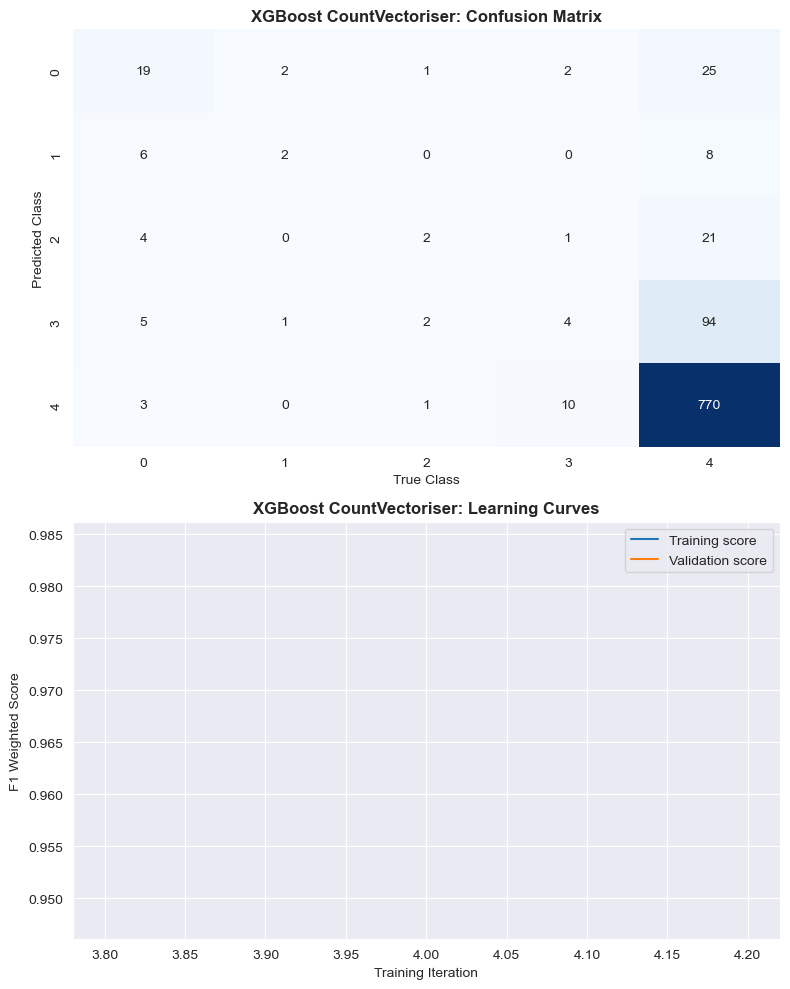


XGBoost
TfidfVectoriser
              precision    recall  f1-score   support

           0       0.51      0.41      0.45        49
           1       0.33      0.06      0.11        16
           2       0.33      0.11      0.16        28
           3       0.28      0.20      0.23       106
           4       0.85      0.93      0.89       784

    accuracy                           0.79       983
   macro avg       0.46      0.34      0.37       983
weighted avg       0.75      0.79      0.77       983

Precision: 75.19%
Recall: 79.04%
F1: 76.55%
Accuracy: 79.04%



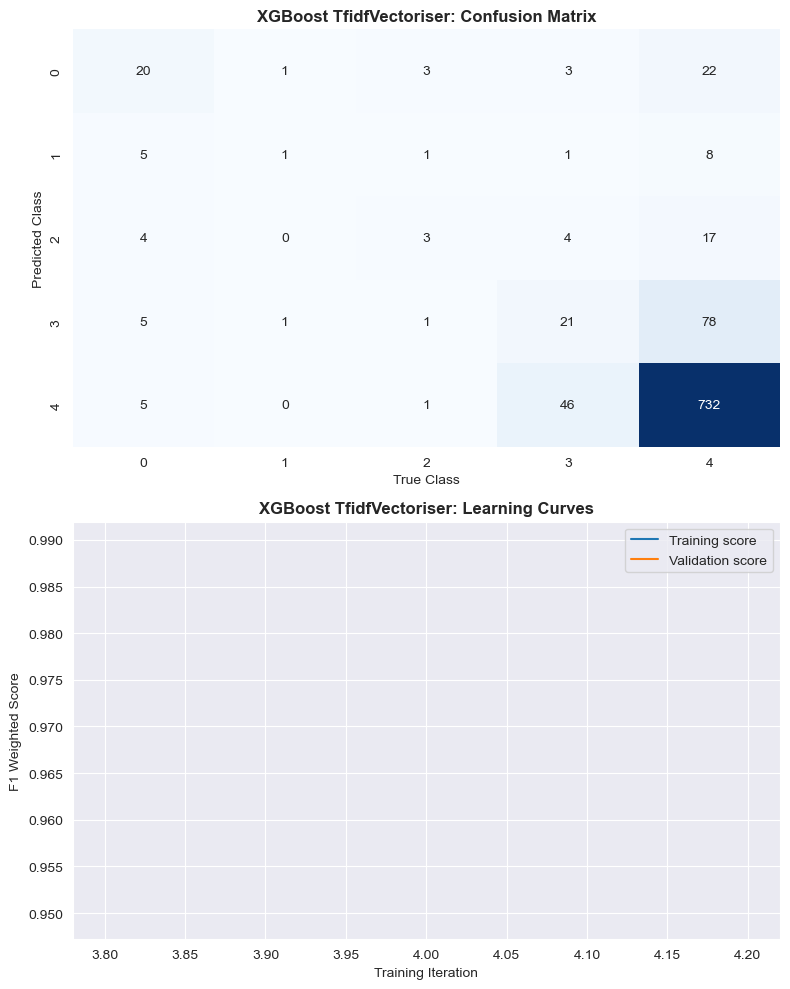

In [60]:
#Evaluate the model
for name, model in zip(ml_model_names, ml_model):
    ml_model_evaluation(name, model)

After training, the machine learning model with the best performance are:

    - Support Vector Machine with TFIDF vectorisation (Precision: 66.82%, Recall: 80.26%, F1: 72.63%, Accuracy: 80.26%).
    - Random Forest with TFIDF vectorisation (Precision: 72.92%, Recall: 80.98%, F1: 75.04%, Accuracy: 80.98%).
    - Extreme Gradient Boost (XGBoost) with Count vectorisation (Precision: 73.60%, Recall: 81.08%, F1: 75.71%, Accuracy: 81.08%).

To found the optimal combination of hyperparameters that will result in the best predictive performance, GridSearchCV or Randomized methods must be applied to those model.

### 7.2 Hyperparameter Tuning (RandomizedSearchCV)

For complex system with large dataset, GridSearchCV will take too much time to execute every combination possible, the best alternative is the RandomizedSearchCV, as you can limit the number combination apply to the model.

In [61]:
#Create the machine learning hyperparameters dictionaries

#Grid Evaluation Function Parameters
grid_names      = ["Support Vector Machine", "Random Forest", "XGBoost"]
grid_models     = [svm_model, rf_model, xgb_model]
grid_vectors    = [tfidf_vectoriser, tfidf_vectoriser, count_vectoriser]

svm_param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["linear", "rbf"],
}

rf_param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

xgb_param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.1,  0.01, 0.05, 0.001],
    "max_depth": [None, 10, 15, 20],
    "subsample": [0.5, 0.8, 0.9, 1.0],
}

grid_params = [svm_param_grid, rf_param_grid, xgb_param_grid]

In [62]:
#Confusion matrix and learning curve function
def plot_estimator_performance(name: str, estimator, y_test, y_pred):
    #Display the confusion matrix and learning curve
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize= (8, 10))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= "g", cmap= "Blues", cbar= False, ax= axs[0])
    axs[0].set_title(f"{name}: Confusion Matrix", fontsize=12, fontweight="bold")
    axs[0].set_xlabel("True Class")
    axs[0].set_ylabel("Predicted Class")


    N, train_score, val_score = learning_curve(estimator,
                                                X_train_res,
                                                y_train_res,
                                                train_sizes= np.linspace(0.1, 1.0, 5),
                                                cv=5,
                                                scoring="f1_weighted", #Ensuring performance on minority classes.
                                                )
    axs[1].plot(train_score.mean(axis= 1), label="Training score")
    axs[1].plot(val_score.mean(axis= 1), label="Validation score")
    axs[1].legend(loc="best")
    axs[1].set_title(f"{name} : Learning Curves", fontsize=12, fontweight="bold")
    axs[1].set_xlabel("Training Iteration")
    axs[1].set_ylabel("F1 Weighted Score")

    # Adjust layout to prevent titles/labels overlapping
    plt.tight_layout()
    plt.show()
    print()

In [63]:
#Create Grid Model Evaluation Function
def grid_evaluation(name: str, model, vectoriser, param:dict):
    print(name)

    #Target Encoding
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    #Vectorisation
    X_train_vect = vectoriser.transform(X_train)
    X_test_vect = vectoriser.transform(X_test)

    #Resample
    X_train_res, y_train_res = smote.fit_resample(X_train_vect, y_train_encoded)

    #Create the estimator
    model_grid = RandomizedSearchCV(model,
                                    param_distributions= param,
                                    n_iter= 10,
                                    scoring= ["precision_weighted", "recall_weighted", "f1_weighted", "accuracy"],
                                    refit= "f1_weighted",
                                    cv= 5,
                                    random_state= 15)

    #Train the estimator
    model_grid.fit(X_train_res, y_train_res)

    #Display Estimator Hyperparameter
    print(f"{name:-<50} Parameters: {model_grid.best_params_}")
    print(f"{name:-<50} Score: {model_grid.best_score_}")

    #Estimator prediction
    y_pred = model_grid.predict(X_test_vect)

    #Display estimator performance
    print(f"Recall: {recall_score(y_test_encoded, y_pred, average= "weighted")*100:.2f}")
    print(f"Precision: {precision_score(y_test_encoded, y_pred, average= "weighted")*100:.2f}")
    print(f"F1 Score: {f1_score(y_test_encoded, y_pred, average= "weighted")*100:.2f}")
    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)*100:.2f}%")
    print()

    #Display the classification report
    print(f"{name}:\n"
          f"{classification_report(y_test_encoded, y_pred)}")
    print()

    #Retrieve the best performance model
    estimator = model_grid.best_estimator_

    #Plot confusion matrix and learning curve
    plot_estimator_performance(name, estimator, y_test_encoded, y_pred)

    return estimator


Support Vector Machine
Support Vector Machine---------------------------- Parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Support Vector Machine---------------------------- Score: 0.9892305478639816
Recall: 80.98
Precision: 71.20
F1 Score: 74.45
Accuracy: 80.98%

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        49
           1       0.00      0.00      0.00        16
           2       0.50      0.04      0.07        28
           3       0.10      0.01      0.02       106
           4       0.83      0.99      0.90       784

    accuracy                           0.81       983
   macro avg       0.39      0.28      0.28       983
weighted avg       0.71      0.81      0.74       983




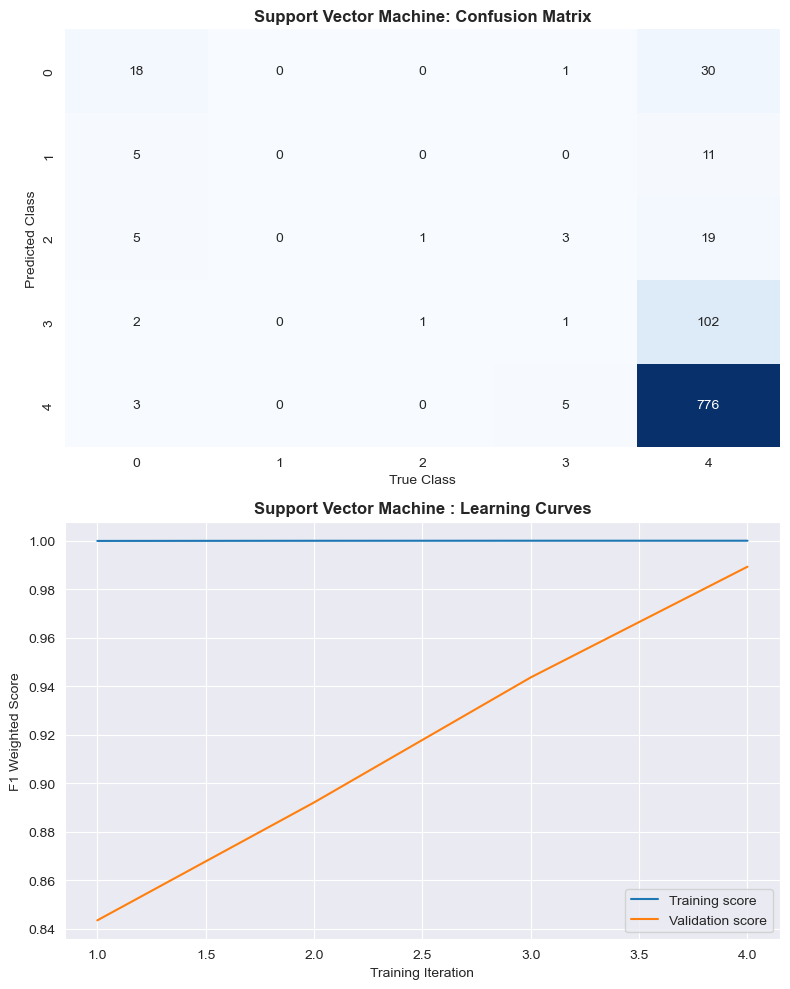


Random Forest
Random Forest------------------------------------- Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'log_loss', 'bootstrap': False}
Random Forest------------------------------------- Score: 0.975425160311314
Recall: 80.67
Precision: 71.38
F1 Score: 74.22
Accuracy: 80.67%

Random Forest:
              precision    recall  f1-score   support

           0       0.56      0.31      0.39        49
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        28
           3       0.29      0.04      0.07       106
           4       0.82      0.99      0.90       784

    accuracy                           0.81       983
   macro avg       0.33      0.27      0.27       983
weighted avg       0.71      0.81      0.74       983




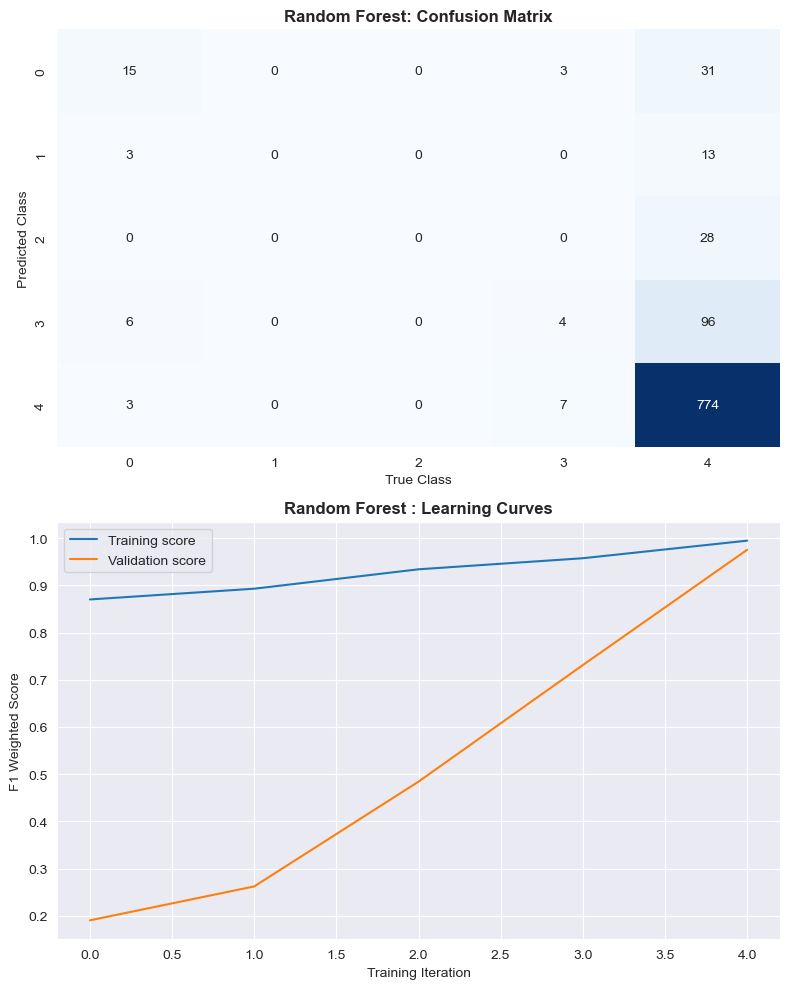


XGBoost
XGBoost------------------------------------------- Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}
XGBoost------------------------------------------- Score: 0.9492819267965746
Recall: 81.08
Precision: 72.22
F1 Score: 74.51
Accuracy: 81.08%

XGBoost:
              precision    recall  f1-score   support

           0       0.55      0.33      0.41        49
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        28
           3       0.33      0.03      0.05       106
           4       0.83      0.99      0.90       784

    accuracy                           0.81       983
   macro avg       0.34      0.27      0.27       983
weighted avg       0.72      0.81      0.75       983




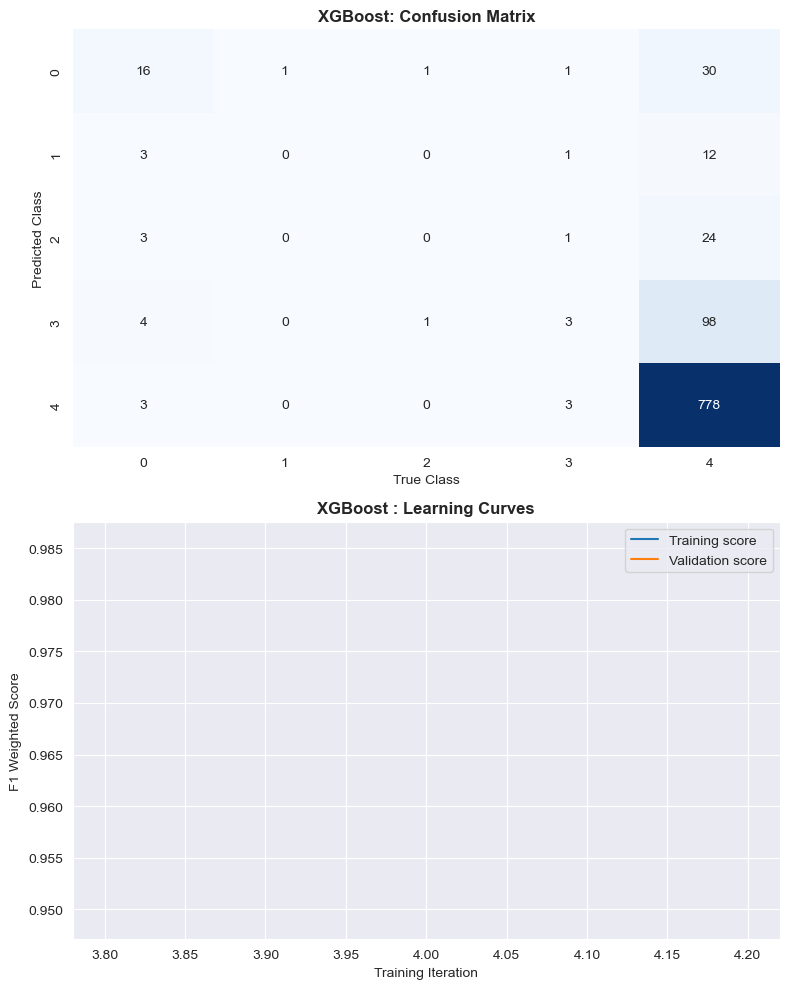

In [64]:
#Evaluate and retrieve the model best estimator
best_estimators = {}
for name, model, vector, param in zip(grid_names, grid_models,grid_vectors, grid_params):
    model = grid_evaluation(name, model, vector, param)
    best_estimators[name] = model

The machine learning model demonstrating the best performance is the Extreme Gradient Boosting model:

    - Precision: 72.22
    - Recall: 81.08
    - F1 Score: 74.51
    - Accuracy: 81.08%

### 7.3 Deep Learning Evaluation Function

There is various deep learning model for NLP sentiment analysis such as:

    - Gated Recurrent Unit (GRU) is a recurrent neural network (RNN) architecture used to process sequential data, such as text or speech.
    - Long Short-Term Memory (LSTM) is a recurrent neural network (RNN) architecture designed to process, classify, and predict sequential data by learning long-term dependencies.
    - Bidirectional Encoder Representations from Transformers (BERT) is the first bidirectional deep learning model use to understand the meaning of text by looking for the targeted word from both side (left and right) simultaneously and determine its meaning.

In [65]:
# TensorFlow Input Pipelines
BATCH_SIZE = 64
output_units = len(y_train.value_counts())

#Label One Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output= False)
y_train_encoded = one_hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded  = one_hot_encoder.transform(y_test.values.reshape(-1, 1))

#Tensor Dataset Pipeline
train_ds    = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds      = tf.data.Dataset.from_tensor_slices((X_test, y_test_encoded)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [66]:
def plot_learning_curve(name: str, history: dict) -> None:

    history = history.history
    fig, axs = plt.subplots(nrows= 5, ncols= 1, figsize= (8, 12))

    axs[0].plot(history["loss"], label= "Train_loss")
    axs[0].plot(history["val_loss"], label= "Val_loss")
    axs[0].set_title(f"{name} Loss Curves", fontsize=12, fontweight="bold")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend(loc="best")

    axs[1].plot(history["precision"], label= "Train_precision")
    axs[1].plot(history["val_precision"], label= "Val_precision")
    axs[1].set_title(f"{name} Precision Curves", fontsize=12, fontweight="bold")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Precision")
    axs[1].legend(loc="best")

    axs[2].plot(history["recall"], label= "Train_recall")
    axs[2].plot(history["val_recall"], label= "Val_recall")
    axs[2].set_title(f"{name} Recall Curves", fontsize=12, fontweight="bold")
    axs[2].set_xlabel("Epochs")
    axs[2].set_ylabel("Recall")
    axs[2].legend(loc="best")

    axs[3].plot(history["f1_score"], label= "Train_f1_score")
    axs[3].plot(history["val_f1_score"], label= "Val_f1_score")
    axs[3].set_title(f"{name} F1 Score Curves", fontsize=12, fontweight="bold")
    axs[3].set_xlabel("Epochs")
    axs[3].set_ylabel("F1 Score")
    axs[3].legend(loc="best")

    axs[4].plot(history["accuracy"], label= "Train_accuracy")
    axs[4].plot(history["val_accuracy"], label= "Val_accuracy")
    axs[4].set_title(f"{name} Accuracy Curves", fontsize=12, fontweight="bold")
    axs[4].set_xlabel("Epochs")
    axs[4].set_ylabel("Accuracy")
    axs[4].legend(loc="best")

    plt.tight_layout()
    plt.show()


In [67]:
def dl_model_evaluation(name: str, model, callback: list= None, iteration: int = 5 ) -> None:

    print(name)

    #Compile the model
    model.compile(loss= "categorical_crossentropy", #Log Loss function for OneHot encode multiclass
                  optimizer= RMSprop(), #Robust Optimizer for dynamic learning scenarios.
                  metrics= ["accuracy", #Performance score for multi classes model
                            "precision",
                            "recall",
                            F1Score(name="f1_score",
                                    average= "weighted", #Ensuring performance on minority classes.
                                ),
                            ]
    )

    #Train the model
    history = model.fit(train_ds, batch_size= BATCH_SIZE, epochs= iteration, validation_data= val_ds, callbacks= callback)

    #Plot the learning curve
    plot_learning_curve(name, history)

### 7.4 Gated Recurrent Units (GRU)

In [68]:
#Create Gated Recurrent Units Model
gru_units = 100

gru_model = Sequential([
    Input(shape=(1,), dtype= tf.string),            # Raw strings input
    token_layer,                                    # Tokenisation layer
    embedder_layer,                                 # Vectorisation layer
    SpatialDropout1D(rate= 0.2),                    # Regularization layer
    Bidirectional(
        GRU(units= gru_units,
            dropout=0.3,
            recurrent_dropout=0.3,
            return_sequences=True,)
                  ),                                # Bidirectional GRU layer
    Bidirectional(
        GRU(units= gru_units,
            dropout= 0.3,
            recurrent_dropout= 0.3,)
            ),                                      # Bidirectional GRU layer

    Dense(units= output_units,
          activation= "softmax")                    #Output layer

])

In [69]:
#Visualise Mode Architecture
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 128)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 128, 7)         │        20,153 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 128, 7)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128, 200)       │        65,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       181,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,758 (1.02 MB)

 Trainable params: 267,758 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
#Callback for GRU model
gru_ckp = ModelCheckpoint(filepath= "gru_model.keras", monitor= "val_f1_score", mode= "max", save_best_only= True)
gru_es  = EarlyStopping(monitor= "val_f1_score", patience= 2, verbose= 1, mode="max", restore_best_weights= True)

### 7.5 Long Short Term Memory (LSTM)

In [71]:
#Create Long Short Term Memory Model
lstm_units = 100

lstm_model = Sequential([
    Input(shape=(1,), dtype= tf.string),            # Raw strings input
    token_layer,                                    # Tokenisation layer
    embedder_layer,                                 # Vectorisation layer
    SpatialDropout1D(rate= 0.2),                    # Regularization layer
    Bidirectional(
        LSTM(units= lstm_units,
            dropout=0.3,
            recurrent_dropout=0.3,
            return_sequences=True,)
                  ),                                # Bidirectional LSTM layer
    Bidirectional(
        LSTM(units= lstm_units,
            dropout= 0.3,
            recurrent_dropout= 0.3,)
            ),                                      # Bidirectional LSTM layer

    Dense(units= output_units,
          activation= "softmax")                    #Output layer

])

In [72]:
#Visualise Mode Architecture
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 128)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 128, 7)         │        20,153 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 128, 7)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128, 200)       │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,358 (1.33 MB)

 Trainable params: 348,358 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#Callback for LSTM model
lstm_ckp = ModelCheckpoint(filepath= "lstm_model.keras", monitor= "val_f1_score", mode= "max", save_best_only= True)
lstm_es  = EarlyStopping(monitor= "val_f1_score", patience= 2, verbose= 1, mode="max", restore_best_weights= True)

Gated Recurrent Gates
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 578ms/step - accuracy: 0.7858 - f1_score: 0.7040 - loss: 0.8076 - precision: 0.7959 - recall: 0.7311 - val_accuracy: 0.7976 - val_f1_score: 0.7077 - val_loss: 0.7681 - val_precision: 0.7976 - val_recall: 0.7976
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 639ms/step - accuracy: 0.7980 - f1_score: 0.7084 - loss: 0.7398 - precision: 0.7980 - recall: 0.7980 - val_accuracy: 0.7976 - val_f1_score: 0.7077 - val_loss: 0.7316 - val_precision: 0.7976 - val_recall: 0.7976
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 652ms/step - accuracy: 0.7993 - f1_score: 0.7116 - loss: 0.6897 - precision: 0.8124 - recall: 0.7889 - val_accuracy: 0.8016 - val_f1_score: 0.7198 - val_loss: 0.6655 - val_precision: 0.8244 - val_recall: 0.7833
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 679ms/step - accuracy: 0.8107 - f1_score: 0.7399 - loss: 0.6242 - precision: 0.8436 - recall: 0.7741 - val_accuracy: 0.8047 - val_f1_score: 0.7359 - val_loss: 0.6375 - val_preci

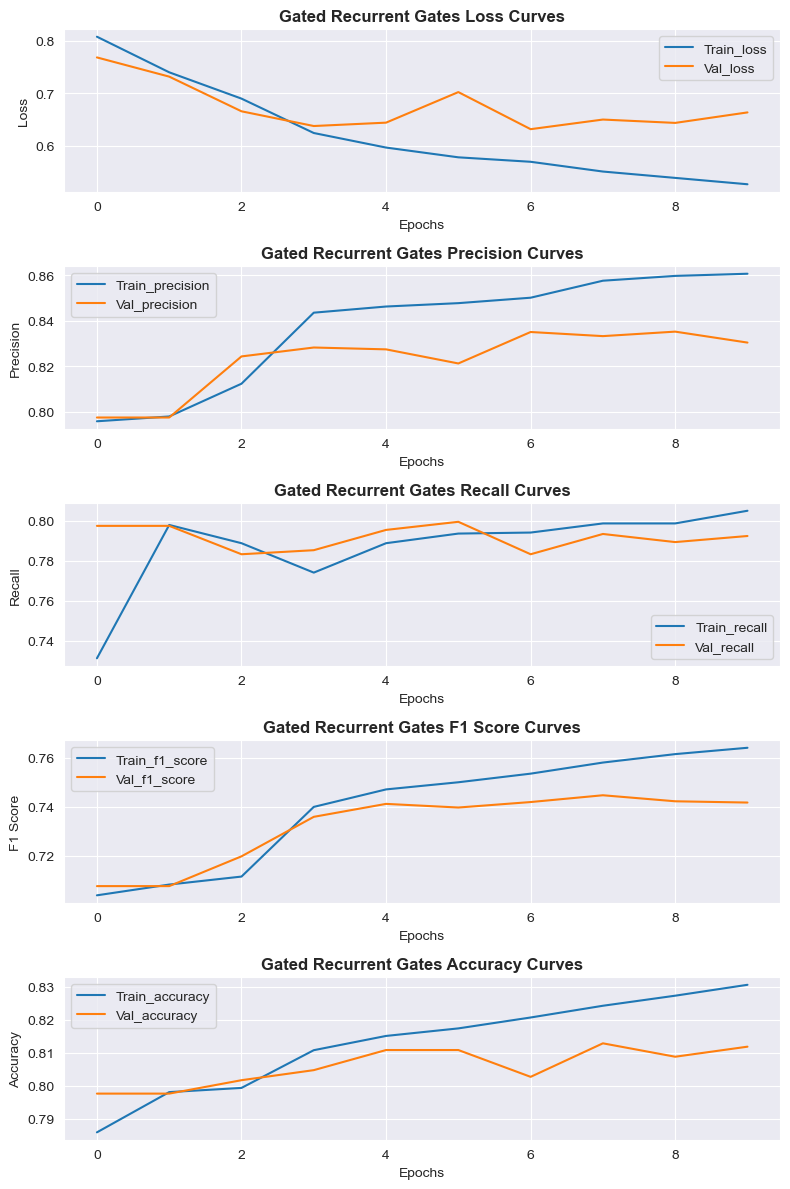

Long Short-Term Memory
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 684ms/step - accuracy: 0.7919 - f1_score: 0.7121 - loss: 0.7411 - precision: 0.8129 - recall: 0.7448 - val_accuracy: 0.8128 - val_f1_score: 0.7418 - val_loss: 0.6254 - val_precision: 0.8395 - val_recall: 0.7823
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 49s 799ms/step - accuracy: 0.8171 - f1_score: 0.7505 - loss: 0.5909 - precision: 0.8553 - recall: 0.7761 - val_accuracy: 0.8067 - val_f1_score: 0.7408 - val_loss: 0.6552 - val_precision: 0.8293 - val_recall: 0.7955
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 49s 794ms/step - accuracy: 0.8209 - f1_score: 0.7557 - loss: 0.5617 - precision: 0.8535 - recall: 0.7886 - val_accuracy: 0.8037 - val_f1_score: 0.7410 - val_loss: 0.6554 - val_precision: 0.8275 - val_recall: 0.7904
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


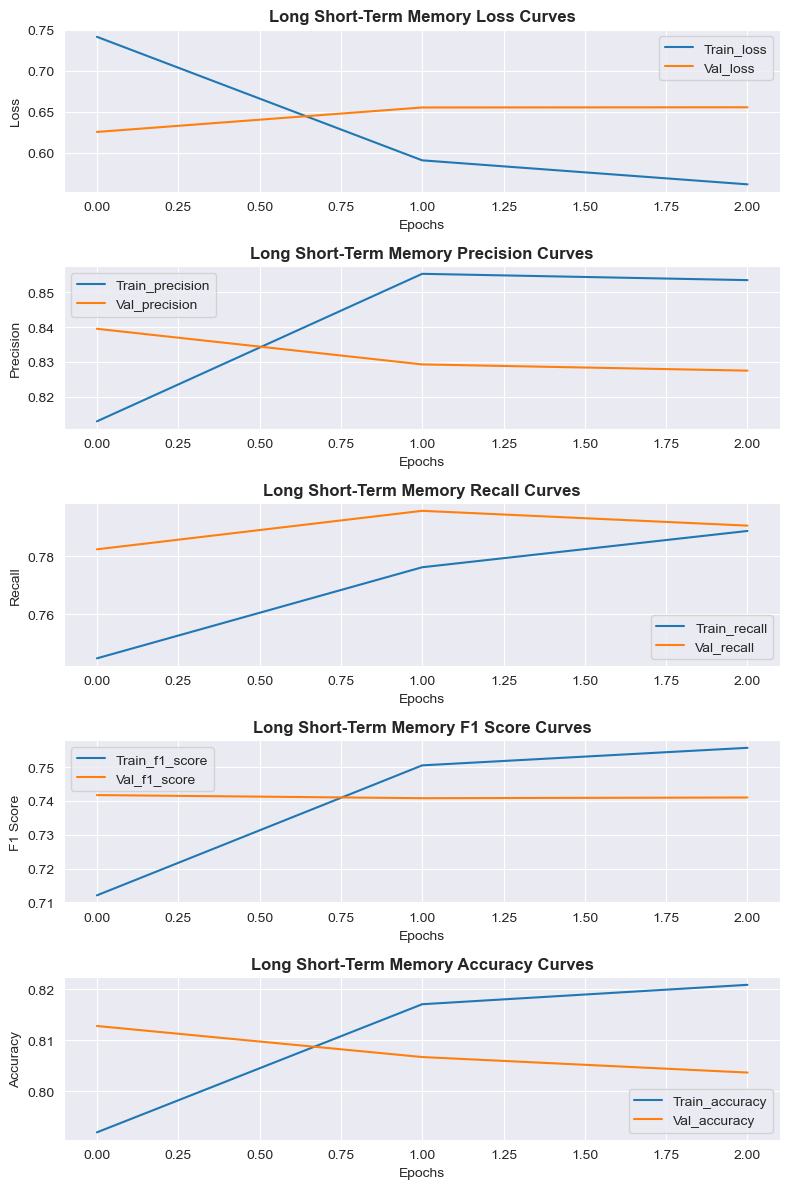

In [74]:
#Evaluate the deep learning model
dl_names        = ["Gated Recurrent Gates", "Long Short-Term Memory"]
dl_models       = [gru_model, lstm_model]
dl_callbacks    = [[gru_ckp, gru_es], [lstm_ckp, lstm_es]]

for name, model, callback in zip(dl_names, dl_models, dl_callbacks):
    dl_model_evaluation(name, model, callback, 10)

Both deep learning model have a slightly better performance than the Extreme Gradient Boosting model but there is also the possibility to apply some fune-tuning on already create model specify in Natural Language Proprecessing such as the Bidirectional Encoder Representation from Transformers (BERT).

### 7.6 Bidirectional Encoder Representations from Transformers (BERT)

#### 7.6.1 Data Conversion

In [98]:
#Parameters
bert_feature = "text"
bert_target  = "labels"

#Copy the Dataframe
bert_train_df = preprocess_train_df.copy()
bert_test_df  = preprocess_test_df.copy()

#Rename the columns
bert_train_df.rename(columns= {clean_feature: bert_feature, target_name: bert_target}, inplace= True)
bert_test_df.rename(columns= {clean_feature: bert_feature, target_name: bert_target}, inplace = True)

#Reset index before conversion
bert_train_df = bert_train_df.reset_index(drop=True)
bert_test_df  = bert_test_df.reset_index(drop=True)

#Label target
bert_train_df[bert_target]  = label_encoder.transform(bert_train_df[bert_target])
bert_test_df[bert_target]   = label_encoder.transform(bert_test_df[bert_target])

#Visualise the new DataFrame
print(f"BERT DataFrame:\n{bert_train_df}")

#Convert Dataframe into Dataset
bert_train_ds = Dataset.from_pandas(bert_train_df)
bert_test_ds  = Dataset.from_pandas(bert_test_df)

#Visualise the new Dataset
print(f"BERT Dataset:\n{bert_train_ds}")


BERT DataFrame:
                                                   text  labels
0     work samsung galaxy perfectly finally space ta...       4
1     use card new samsung phone work problem large ...       4
2     need cell phone work perfectly sandisk never d...       4
3     great price ultra rf high speed good stability...       4
4     comore esta memorka para completar mi nueva sa...       3
...                                                 ...     ...
3926  rate performance use file android keep modest ...       4
3927  order use new samsung galaxy sii phone use san...       4
3928  get sale samsung galaxy note ii work great als...       3
3929  get format phone seem work perfectly able tran...       4
3930  buy sandisk ssd computer fast price feel confi...       4

[3931 rows x 2 columns]
BERT Dataset:
Dataset({
    features: ['text', 'labels'],
    num_rows: 3931
})


#### 7.6.2 BERT Tokeniser

In [99]:
#Tokenisation
model_name = "bert-base-uncased"
bert_tokeniser = BertTokenizer.from_pretrained(model_name)

#Create the tokenisation function
def bert_tokenise(dataset: Dataset) -> list:
    return bert_tokeniser(dataset[bert_feature],
                          padding= "max_length",
                          truncation= True,
                          max_length= SEQ_LENGTH,
                          #return_tensors= "pt"
                          )

In [100]:
#Tokenise the dataset
tokenise_bert_train_ds = bert_train_ds.map(
    bert_tokenise,
    batched= True,
    batch_size= BATCH_SIZE,
    remove_columns= bert_feature,
)
tokenise_bert_test_ds = bert_test_ds.map(
    bert_tokenise,
    batched= True,
    batch_size= BATCH_SIZE,
    remove_columns= bert_feature,
)

#Dataset to Pytorch Format
bert_columns = ["input_ids", "attention_mask", "labels"]
tokenise_bert_train_ds.set_format(type="torch", columns= bert_columns)
tokenise_bert_test_ds.set_format(type="torch", columns= bert_columns)


Map: 100%|██████████| 983/983 [00:00<00:00, 1604.25 examples/s]


#### 7.6.3 Metrics

In [101]:
# Load standard classification metrics
metrics_precision = evaluate.load("precision")
metrics_recall    = evaluate.load("recall")
metrics_f1        = evaluate.load("f1")
metrics_accuracy  = evaluate.load("accuracy")


#Metrics calculation function
def compute_metrics(eval_preds: EvalPrediction) -> dict:
    logits, labels = eval_preds.predictions, eval_preds.label_ids

    if isinstance(logits, tuple):
        logits = logits[0]

    # Retrieve the index (label) with the highest score for each data
    predictions = np.argmax(logits, axis= -1)

    #Calculate the metrics
    precision   = metrics_precision.compute(predictions= predictions, references= labels, average= "weighted")
    recall      = metrics_recall.compute(predictions= predictions, references= labels, average= "weighted")
    f1          = metrics_f1.compute(predictions= predictions, references= labels, average= "weighted")
    accuracy    = metrics_accuracy.compute(predictions= predictions, references= labels)

    metrics = {
        "precision": precision["precision"],
        "recall": recall["recall"],
        "f1": f1["f1"],
        "accuracy": accuracy["accuracy"],
    }

    return metrics

#### 7.6.3 BERT Model

In [102]:
#Load Pytorch Pre-Trained BERT Model
bert_model = BertForSequenceClassification.from_pretrained(model_name, num_labels= output_units)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [103]:
#Define Training Argument and Trainer (Fine-Tuning)
result_path = "./bert/output"
os.makedirs(result_path, exist_ok= True)

training_args = TrainingArguments(
    output_dir= result_path,
    num_train_epochs= 4,
    per_device_train_batch_size= BATCH_SIZE,
    learning_rate= 2e-5,
    eval_strategy= "epoch",
    logging_strategy= "epoch",
    torch_compile= False,
    data_seed= 15,
)

# Trainer handles the training loop, optimization, and evaluation
trainer = Trainer(
    model= bert_model,
    args= training_args,
    train_dataset= tokenise_bert_train_ds,
    eval_dataset= tokenise_bert_test_ds,
    compute_metrics= compute_metrics,
)

In [104]:
#Train BERT Model
train_result=  trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.871600,0.617166,0.663909,0.801628,0.719839,0.801628
2,0.615400,0.580578,0.704440,0.825025,0.759503,0.825025
3,0.560700,0.575664,0.705718,0.806714,0.750057,0.806714
4,0.531300,0.565231,0.705195,0.819939,0.757035,0.819939


The BERT model has the best global measured performance metrics:

    - Precision: 70.44%
    - Recall: 82.50%
    - F1: 75.95%
    - Accuracy: 82.50%

#### 7.6.4 Inference (Predicition)

In [259]:
#Test the model prediction
classifier = pipeline("sentiment-analysis", model= bert_model, tokenizer= bert_tokeniser)

#Select random phrase
n =  randint(0, len(bert_test_df[bert_feature]))
test_text = bert_test_df.loc[n, bert_feature]
test_label = bert_test_df.loc[n, bert_target]

print(f"Test Text: {test_text}")
print(f"True Label: {test_label}")
print(f"Predict Label: {classifier.predict(test_text)}")

Device set to use cpu


Test Text: work sansa fuze give million song okay slight exaggeration enough song listen song without repeat day speed fine device speak camera usage class fast enough video
True Label: 4
Predict Label: [{'label': 'LABEL_4', 'score': 0.8668828010559082}]


## VIII. Conclusion

In this sentiment analysis project, after create and train multiple machine learning and deep learning models and then compared their performance on an imbalance labeled multi classes text dataset. Among all the evaluated approaches, the BERT-based model consistently slightly outperformed traditional machine learning and basic deep learning models across key metrics such as accuracy, precision, recall, and F1-score.

BERT model superior performance can be attributed to its bidirectional context understanding and expensive pre-training on a very large dataset corpus, which allows it to capture nuanced meanings, word dependencies, and contextual sentiment more effectively than traditional sequential et/or recurrent models. This makes BERT particularly well-suited for sentiment analysis tasks where meaning depends heavily on context.

Additionally, a prediction function was implemented to enable real-time sentiment classification on unseen text. This function makes the model practical for real-world applications such as social media monitoring, product review analysis, and customer feedback systems. Overall, the results demonstrate that transformer-based models like BERT provide a powerful and reliable solution for sentiment analysis tasks.

## Future Optimization

For industry-level deployment, the sentiment analysis system can be further optimised to meet real-world performance, scalability, and reliability requirements. While the BERT model delivers high accuracy, future optimisation should emphasise efficiency, robustness, and seamless integration.

First, reducing the number of sentiment labels (from five to three classes, such as Positive, Neutral, and Negative) simplifies the classification task, enables faster inference, lowers annotation costs, and minimizes class imbalance issues.

Second, focusing on minority classes by using macro-averaged evaluation metrics (Macro Precision, Recall, and F1-score) provides a fair assessment in industry scenarios where minority classes are as important as majority classes.

Third, to reduce latency and computational cost, lightweight transformer variants such as DistilBERT or ALBERT can be employed, along with model compression techniques including quantization, knowledge distillation, and pruning.

Fourth, scalability can be improved by integrating the model into cloud-based architectures using containerisation (Docker) and orchestration tools (Kubernetes), allowing the system to handle high-volume, real-time data streams from sources such as customer reviews, social media platforms, and support tickets.

Fifth, domain-specific fine-tuning using industry-relevant datasets (e.g., e-commerce, finance, healthcare) can further enhance sentiment prediction accuracy.

Finally, continuous learning pipelines with automated retraining can ensure that the system adapts to evolving language patterns and changing customer behavior.